In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1R14RoLsAjEcxoOYZYk_hJOIROuSYEL_8" -O abnormal.rar

--2025-07-21 07:54:51--  https://drive.google.com/uc?export=download&id=1R14RoLsAjEcxoOYZYk_hJOIROuSYEL_8
Resolving drive.google.com (drive.google.com)... 74.125.142.100, 74.125.142.139, 74.125.142.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1R14RoLsAjEcxoOYZYk_hJOIROuSYEL_8&export=download [following]
--2025-07-21 07:54:51--  https://drive.usercontent.google.com/download?id=1R14RoLsAjEcxoOYZYk_hJOIROuSYEL_8&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.20.132, 2607:f8b0:400e:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.20.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38499654 (37M) [application/octet-stream]
Saving to: ‘abnormal.rar’

abnormal.rar        100%[===================>]  36.72M  92.3MB/s    

In [ ]:
# Install gdown (if not already installed)
!pip install -q gdown

# Download file using Google Drive file ID
file_id = "1QdT5wLUvGmyTRXKrlHSdpYKIvy73ZA0e"
output_name = "/content/normal.rar"

!gdown --id {file_id} -O {output_name}

# Check the downloaded file
!ls -lh {output_name}


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1QdT5wLUvGmyTRXKrlHSdpYKIvy73ZA0e
From (redirected): https://drive.google.com/uc?id=1QdT5wLUvGmyTRXKrlHSdpYKIvy73ZA0e&confirm=t&uuid=7e56aec5-4094-43a5-90ea-b978c0cab37f
To: /content/normal.rar
100% 217M/217M [00:03<00:00, 63.1MB/s]
-rw-r--r-- 1 root root 207M Jul  9 15:00 /content/normal.rar


In [ ]:
!unrar x /content/normal.rar /content/normal_extracted/


Streaming output truncated to the last 5000 lines.
Extracting  /content/normal_extracted/normal/frame_001803.jpg             23%  OK 
Extracting  /content/normal_extracted/normal/frame_001804.jpg             23%  OK 
Extracting  /content/normal_extracted/normal/frame_001805.jpg             23%  OK 
Extracting  /content/normal_extracted/normal/frame_001986.jpg             23%  OK 
Extracting  /content/normal_extracted/normal/frame_001987.jpg             23%  OK 
Extracting  /content/normal_extracted/normal/frame_001988.jpg             23%  OK 
Extracting  /content/normal_extracted/normal/frame_001989.jpg             23%  OK 
Extracting  /content/normal_extracted/normal/frame_001990.jpg             23%  OK 
Extracting  /content/normal_extracted/normal/frame_001991.jpg             23%  OK 
Extracting  /content/normal_extracted/normal/frame_001992.jpg             23%  OK 
Extracting  /content/normal_e

In [ ]:
!unrar x /content/abnormal.rar /content/abnormal_extracted/



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/abnormal.rar

Creating    /content/abnormal_extracted                               OK
Creating    /content/abnormal_extracted/abnormal                      OK
Extracting  /content/abnormal_extracted/abnormal/frame_000525.jpg          0%  OK 
Extracting  /content/abnormal_extracted/abnormal/frame_000526.jpg          0%  OK 
Extracting  /content/abnormal_extracted/abnormal/frame_000527.jpg          0%  OK 
Extracting  /content/abnormal_extracted/abnormal/frame_000528.jpg          0%  OK 
Extracting  /content/abnormal_extracted/abnormal/frame_000529.jpg          0%  OK 
Extracting  /content/abnormal_extracted/abnormal/frame_000530.jpg          0%  OK 
Extracting  /content/abnormal_extracted/abnormal/frame_000531.jpg          0%  OK 
Extracting  /content/abnormal_extracted/abnormal/frame_000532.jpg          0%  OK 
Ext

In [ ]:
ls -l /content/normal_extracted/normal | grep ^- | wc -l


6602


In [ ]:
ls -l /content/abnormal_extracted/abnormal | grep ^- | wc -l


1137


In [ ]:
import cv2
import os
import numpy as np
from glob import glob

input_dir = "/content/abnormal_extracted/abnormal"
output_dir = "/content/abnormal_augmented"
os.makedirs(output_dir, exist_ok=True)

images = glob(os.path.join(input_dir, "*.jpg"))

def augment_image(img):
    # Random scale
    scale = np.random.uniform(0.8, 1.2)
    h, w = img.shape[:2]
    img_scaled = cv2.resize(img, (int(w*scale), int(h*scale)))

    # Center crop or pad to original size
    if scale < 1:
        # pad
        pad_h = (h - img_scaled.shape[0]) // 2
        pad_w = (w - img_scaled.shape[1]) // 2
        img_scaled = cv2.copyMakeBorder(img_scaled, pad_h, h - img_scaled.shape[0] - pad_h,
                                        pad_w, w - img_scaled.shape[1] - pad_w,
                                        cv2.BORDER_CONSTANT, value=[0,0,0])
    else:
        # crop center
        start_h = (img_scaled.shape[0] - h) // 2
        start_w = (img_scaled.shape[1] - w) // 2
        img_scaled = img_scaled[start_h:start_h+h, start_w:start_w+w]

    # Random rotation
    angle = np.random.uniform(-30, 30)
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
    img_rotated = cv2.warpAffine(img_scaled, M, (w, h))

    return img_rotated

# Number of times to augment each image depends on ratio of normal to abnormal counts
augment_factor = int(6602 / 1137)  # just an example ratio

for idx, img_path in enumerate(images):
    img = cv2.imread(img_path)
    base_name = os.path.basename(img_path).split('.')[0]

    for i in range(augment_factor):
        augmented_img = augment_image(img)
        out_path = os.path.join(output_dir, f"{base_name}_aug_{i}.jpg")
        cv2.imwrite(out_path, augmented_img)


In [ ]:
import os

def count_images(folder_path, extensions=['.jpg', '.jpeg', '.png']):
    count = 0
    for filename in os.listdir(folder_path):
        if any(filename.lower().endswith(ext) for ext in extensions):
            count += 1
    return count

abnormal_path = "/content/abnormal_augmented"
normal_path = "/content/normal_extracted/normal"

print(f"Number of images in abnormal folder: {count_images(abnormal_path)}")
print(f"Number of images in normal folder: {count_images(normal_path)}")


Number of images in abnormal folder: 5685
Number of images in normal folder: 6602


In [ ]:
# ✅ Import libraries
import os
import numpy as np
import cv2
import torch
import timm
from tqdm import tqdm
from torchvision import transforms

# ⚙️ Settings
IMG_SIZE = 224
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📁 Data paths (adjust if needed)
normal_dir = "/content/normal_extracted/normal"
anomaly_dir = "/content/abnormal_augmented"

# 📁 Save path in Google Drive
save_dir = "/content/drive/MyDrive/UMN"
os.makedirs(save_dir, exist_ok=True)

# ✅ List of models
model_names = [
    'convnext_tiny',
    'repvgg_a0',
    'mobileone_s0',
    'poolformer_s12',
    'maxvit_tiny_tf_224',
    'coatnet_0_rw_224'
]

# 🧼 Image preprocessing
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 📥 Get list of image paths
def get_image_paths(directory):
    return [os.path.join(directory, f)
            for f in os.listdir(directory)
            if f.lower().endswith(('.jpg', '.jpeg', '.png', 'tif', 'tiff'))]

# 🔍 Feature extraction
def extract_features(model, image_paths):
    features = []
    for path in tqdm(image_paths, desc="Extracting features"):
        img = cv2.imread(path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_tensor = preprocess(img).unsqueeze(0).to(device)

        with torch.no_grad():
            feat = model(img_tensor)
        features.append(feat.cpu().numpy().squeeze())
    return np.array(features)

# 🔁 Run processing for each model
for model_name in model_names:
    print(f"\n🔧 Processing model: {model_name}")
    model = timm.create_model(model_name, pretrained=True, num_classes=0)
    model.eval()

    # ⛔ Freeze 85% of layers
    total_layers = sum(1 for _ in model.parameters())
    trainable_start = int(total_layers * 0.85)
    for i, param in enumerate(model.parameters()):
        param.requires_grad = i >= trainable_start
    model.to(device)

    # 🔹 Get image paths
    normal_paths = get_image_paths(normal_dir)
    anomaly_paths = get_image_paths(anomaly_dir)

    # 🔹 Extract normal features
    print("🔹 Extracting NORMAL features...")
    normal_features = extract_features(model, normal_paths)

    # 🔸 Extract anomaly features
    print("🔸 Extracting ANOMALY features...")
    anomaly_features = extract_features(model, anomaly_paths)

    # 💾 Save features in Google Drive
    model_id = model_name.replace('/', '_')
    np.save(os.path.join(save_dir, f'normal_features_{model_id}.npy'), normal_features)
    np.save(os.path.join(save_dir, f'anomaly_features_{model_id}.npy'), anomaly_features)

    print(f"✅ Saved features for model: {model_id} to {save_dir}")



🔧 Processing model: convnext_tiny


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 6602/6602 [01:20<00:00, 81.51it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 5685/5685 [00:58<00:00, 97.81it/s] 


✅ Saved features for model: convnext_tiny to /content/drive/MyDrive/UMN

🔧 Processing model: repvgg_a0


model.safetensors:   0%|          | 0.00/36.6M [00:00<?, ?B/s]

🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 6602/6602 [01:11<00:00, 92.39it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 5685/5685 [01:01<00:00, 91.78it/s] 


✅ Saved features for model: repvgg_a0 to /content/drive/MyDrive/UMN

🔧 Processing model: mobileone_s0


model.safetensors:   0%|          | 0.00/21.7M [00:00<?, ?B/s]

🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 6602/6602 [03:17<00:00, 33.38it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 5685/5685 [02:48<00:00, 33.70it/s]


✅ Saved features for model: mobileone_s0 to /content/drive/MyDrive/UMN

🔧 Processing model: poolformer_s12


model.safetensors:   0%|          | 0.00/47.7M [00:00<?, ?B/s]

🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 6602/6602 [01:03<00:00, 103.85it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 5685/5685 [00:54<00:00, 104.91it/s]


✅ Saved features for model: poolformer_s12 to /content/drive/MyDrive/UMN

🔧 Processing model: maxvit_tiny_tf_224


model.safetensors:   0%|          | 0.00/124M [00:00<?, ?B/s]

🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 6602/6602 [03:40<00:00, 29.95it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 5685/5685 [03:03<00:00, 30.91it/s]


✅ Saved features for model: maxvit_tiny_tf_224 to /content/drive/MyDrive/UMN

🔧 Processing model: coatnet_0_rw_224


model.safetensors:   0%|          | 0.00/110M [00:00<?, ?B/s]

🔹 Extracting NORMAL features...


Extracting features: 100%|██████████| 6602/6602 [01:36<00:00, 68.09it/s]


🔸 Extracting ANOMALY features...


Extracting features: 100%|██████████| 5685/5685 [01:30<00:00, 62.74it/s]


✅ Saved features for model: coatnet_0_rw_224 to /content/drive/MyDrive/UMN


In [ ]:
for model_name in model_names:
    model_id = model_name.replace('/', '_')
    normal_path = os.path.join(save_dir, f'normal_features_{model_id}.npy')
    anomaly_path = os.path.join(save_dir, f'anomaly_features_{model_id}.npy')

    if not os.path.exists(normal_path) or not os.path.exists(anomaly_path):
        print(f"❌ Missing: {model_id}")
        continue

    normal_features = np.load(normal_path)
    anomaly_features = np.load(anomaly_path)

    print(f"✅ {model_id} - Normal: {normal_features.shape}, Anomaly: {anomaly_features.shape}")


✅ convnext_tiny - Normal: (6602, 768), Anomaly: (5685, 768)
✅ repvgg_a0 - Normal: (6602, 1280), Anomaly: (5685, 1280)
✅ mobileone_s0 - Normal: (6602, 1024), Anomaly: (5685, 1024)
✅ poolformer_s12 - Normal: (6602, 512), Anomaly: (5685, 512)
✅ maxvit_tiny_tf_224 - Normal: (6602, 512), Anomaly: (5685, 512)
✅ coatnet_0_rw_224 - Normal: (6602, 768), Anomaly: (5685, 768)


In [ ]:
!pip install grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.5 MB/s e

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


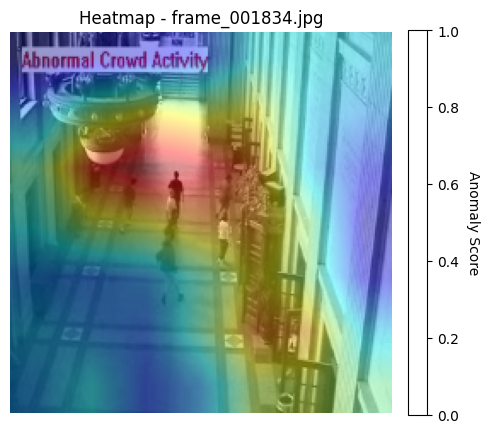

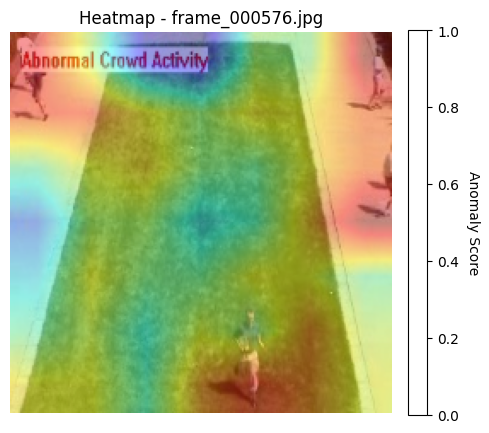

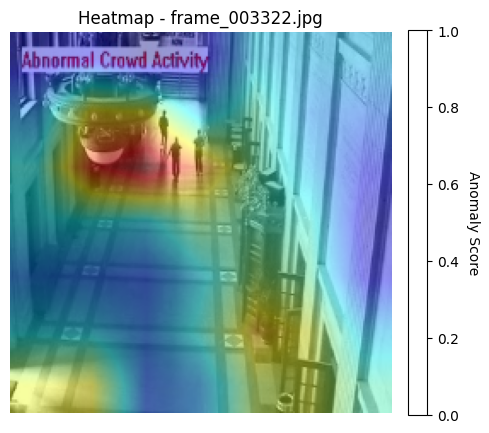

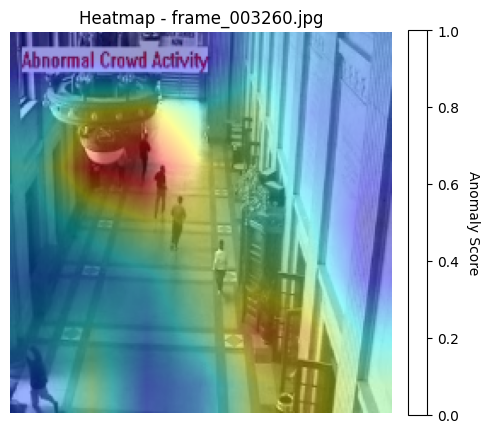

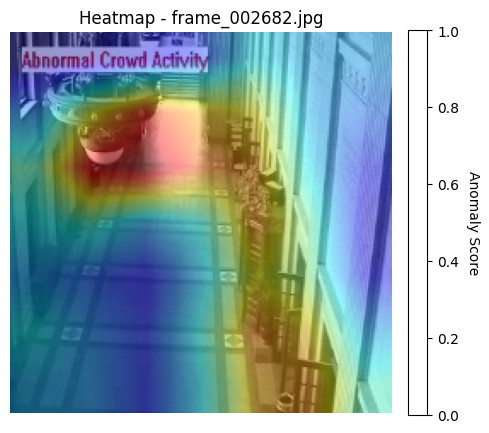

In [ ]:
import os
import numpy as np
import cv2
import torch
import timm
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt
import random

# ⚙️ Path to abnormal images
anomaly_dir = "/content/abnormal_extracted/abnormal"
IMG_SIZE = 224

# 🌀 Preprocessing
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 🧠 Load model
model = timm.create_model('repvgg_a0', pretrained=True, num_classes=2)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 🔍 Grad-CAM++
class GradCAMPlusPlus:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output
        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0]
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def generate(self, input_tensor):
        self.model.zero_grad()
        output = self.model(input_tensor)
        class_idx = torch.argmax(output, dim=1).item()
        score = output[0, class_idx]
        score.backward()

        gradients = self.gradients
        activations = self.activations

        b, k, h, w = gradients.size()
        alpha_num = gradients.pow(2)
        alpha_denom = 2 * gradients.pow(2) + activations * gradients.pow(3).sum(-1).sum(-1).view(b, k, 1, 1)
        alpha_denom = torch.where(alpha_denom != 0.0, alpha_denom, torch.ones_like(alpha_denom))
        alpha = alpha_num / alpha_denom

        weights = torch.relu(F.relu(gradients) * alpha).sum(-1).sum(-1).view(b, k, 1, 1)
        cam = (weights * activations).sum(1, keepdim=True)

        cam = F.relu(cam)
        cam = F.interpolate(cam, size=(IMG_SIZE, IMG_SIZE), mode='bilinear', align_corners=False)
        cam = cam - cam.min()
        cam = cam / (cam.max() + 1e-8)

        return cam.cpu().detach().numpy().squeeze()

# 🎯 Identify target convolutional layer
conv_layers = [m for m in model.modules() if isinstance(m, torch.nn.Conv2d)]
target_layer = conv_layers[-1]
gradcam = GradCAMPlusPlus(model, target_layer)

# 📂 Get list of image paths
all_image_paths = sorted([
    os.path.join(anomaly_dir, fname)
    for fname in os.listdir(anomaly_dir)
    if fname.lower().endswith(('.jpg', '.jpeg', '.tif','tiff'))
])

# Randomly select 5 diverse images
random.seed(42)  # for reproducibility
image_paths = random.sample(all_image_paths, min(5, len(all_image_paths)))

# 🔥 Process and display heatmaps
for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_tensor = preprocess(img_rgb).unsqueeze(0).to(device)

    # Generate heatmap
    heatmap = gradcam.generate(img_tensor)

    # Convert to colored heatmap
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

    # Resize original image
    img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))

    # Blend heatmap with original image
    alpha = 0.4
    blended = cv2.addWeighted(img_resized, 1 - alpha, heatmap_color, alpha, 0)

    # Display with matplotlib + colorbar
    plt.figure(figsize=(5, 5))
    plt.imshow(blended)
    plt.title(f"Heatmap - {os.path.basename(path)}")
    plt.axis('off')

    # Add colorbar from raw heatmap
    im = plt.imshow(heatmap, cmap='jet', alpha=0)
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label("Anomaly Score", rotation=270, labelpad=15)

    plt.tight_layout()
    plt.show()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7693 - loss: 0.4663 - val_accuracy: 0.9996 - val_loss: 0.0912
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.1192 - val_accuracy: 1.0000 - val_loss: 0.0237
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9959 - loss: 0.0585 - val_accuracy: 1.0000 - val_loss: 0.0111
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9989 - loss: 0.0361 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9994 - loss: 0.0245 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9995 - loss: 0.0175 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9992 - loss: 0.0133 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy:

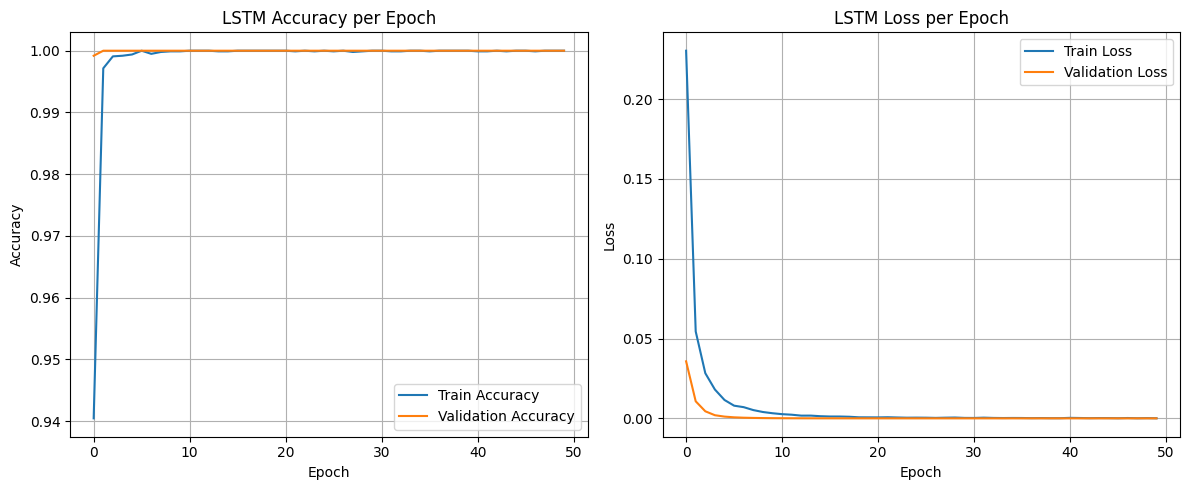


==== Summary for LSTM (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


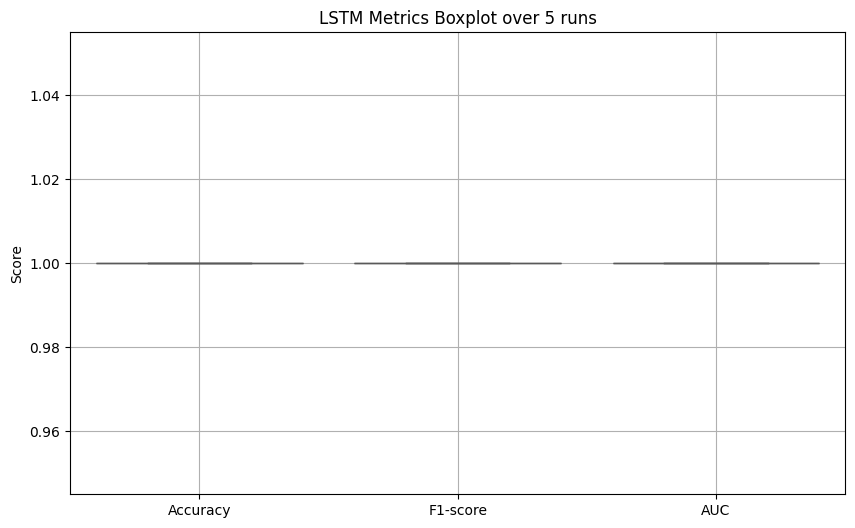


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8223 - loss: 0.3875 - val_accuracy: 0.9996 - val_loss: 0.0370
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9908 - loss: 0.0781 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9974 - loss: 0.0368 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9992 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 9.7956e-04
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9999 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 5.7538e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9994 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 3.3909e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step 

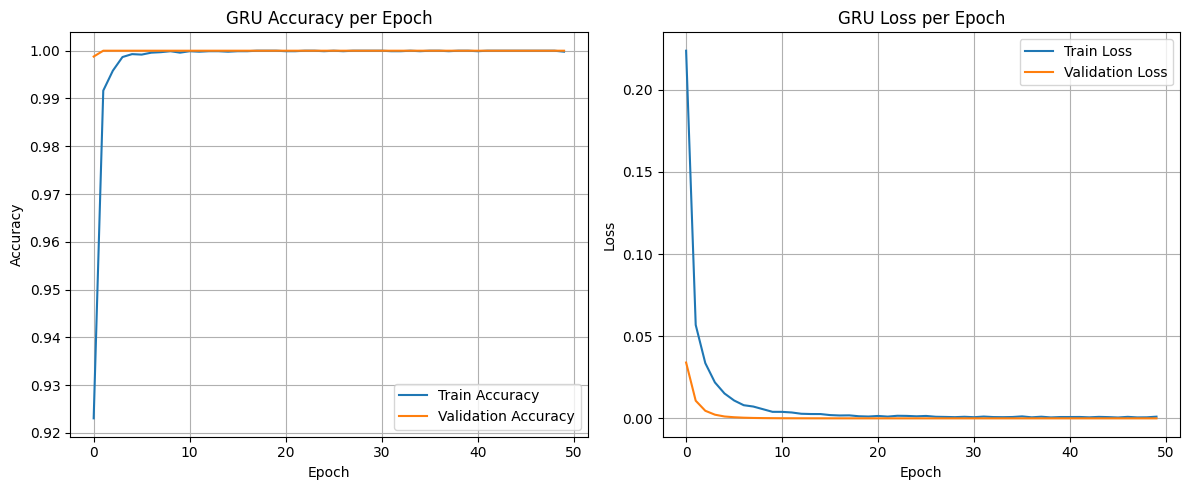


==== Summary for GRU (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


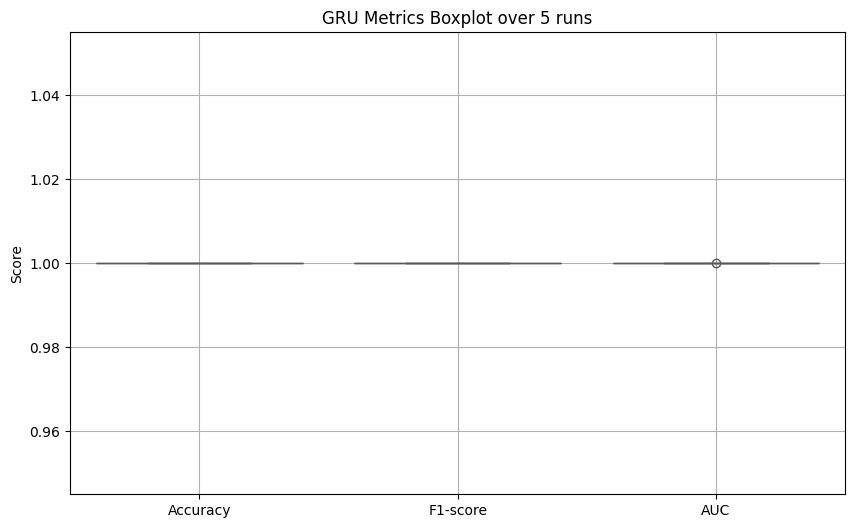


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7535 - loss: 0.5233 - val_accuracy: 0.9988 - val_loss: 0.1486
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9717 - loss: 0.1777 - val_accuracy: 1.0000 - val_loss: 0.0321
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9964 - loss: 0.0688 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9993 - loss: 0.0320 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9997 - loss: 0.0195 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9996 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 6.0732e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 3.0382e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 1

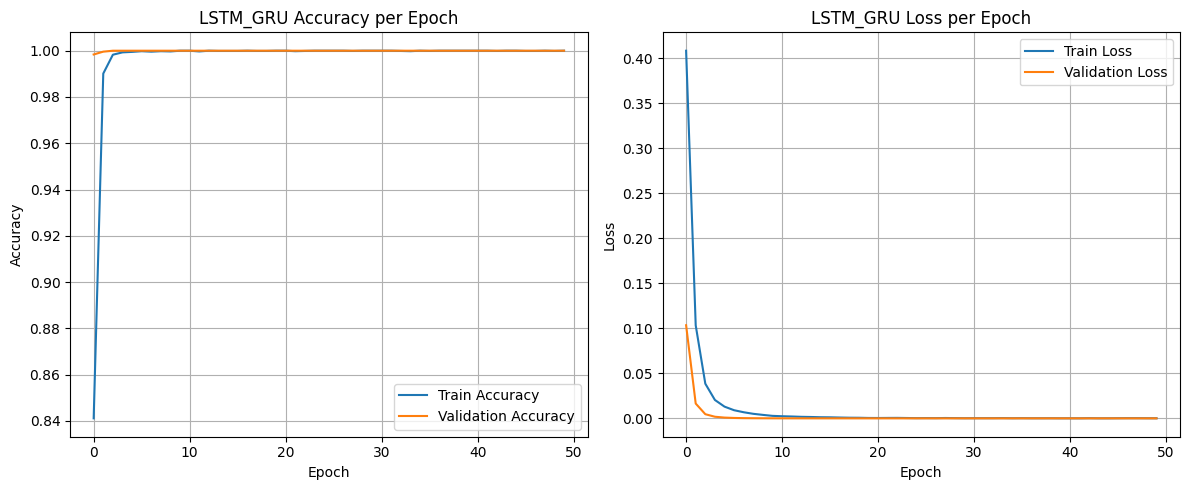


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


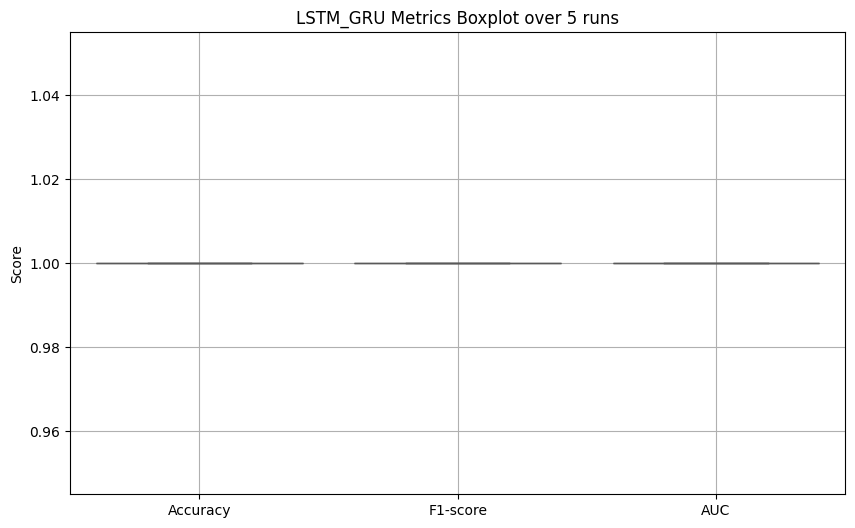


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8235 - loss: 0.3912 - val_accuracy: 0.9988 - val_loss: 0.0316
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9895 - loss: 0.0719 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9942 - loss: 0.0418 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9972 - loss: 0.0257 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - loss: 0.0175 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9995 - loss: 0.0103 - val_accuracy: 1.0000 - val_loss: 5.9986e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9996 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 3.4315e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

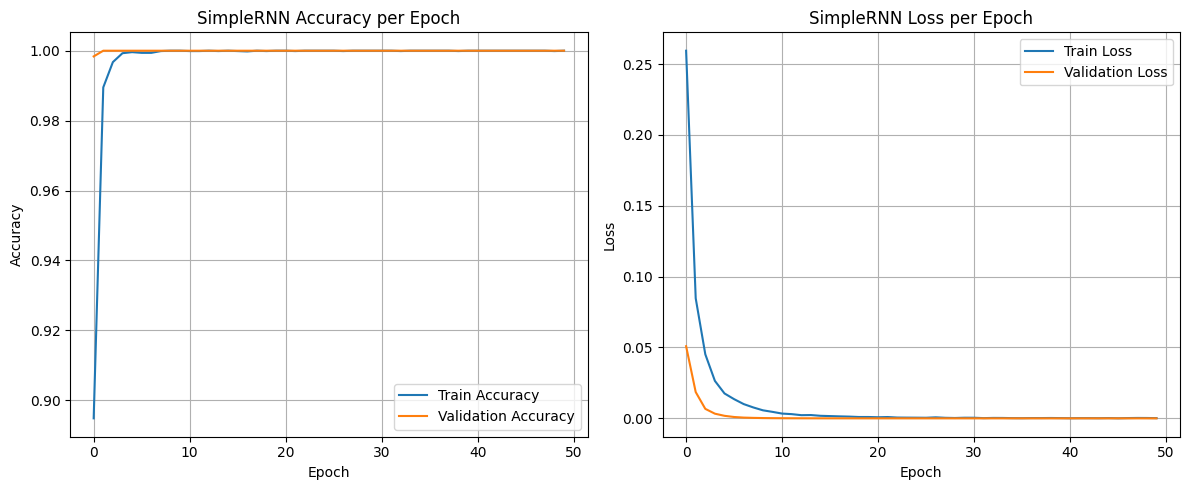


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


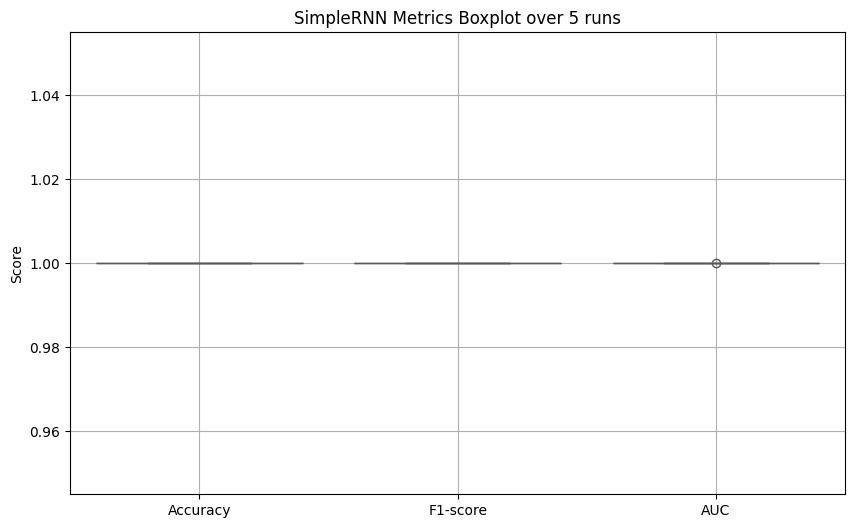


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8074 - loss: 0.4287 - val_accuracy: 0.9984 - val_loss: 0.0063
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9821 - loss: 0.0511 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9920 - loss: 0.0267 - val_accuracy: 0.9992 - val_loss: 0.0019
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9949 - loss: 0.0186 - val_accuracy: 0.9996 - val_loss: 5.8486e-04
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 1.0000 - val_loss: 3.6381e-04
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9973 - loss: 0.0083 - val_accuracy: 0.9996 - val_loss: 6.9192e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9975 - loss: 0.0095 - val_accuracy: 1.0000 - val_loss: 3.5775e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms

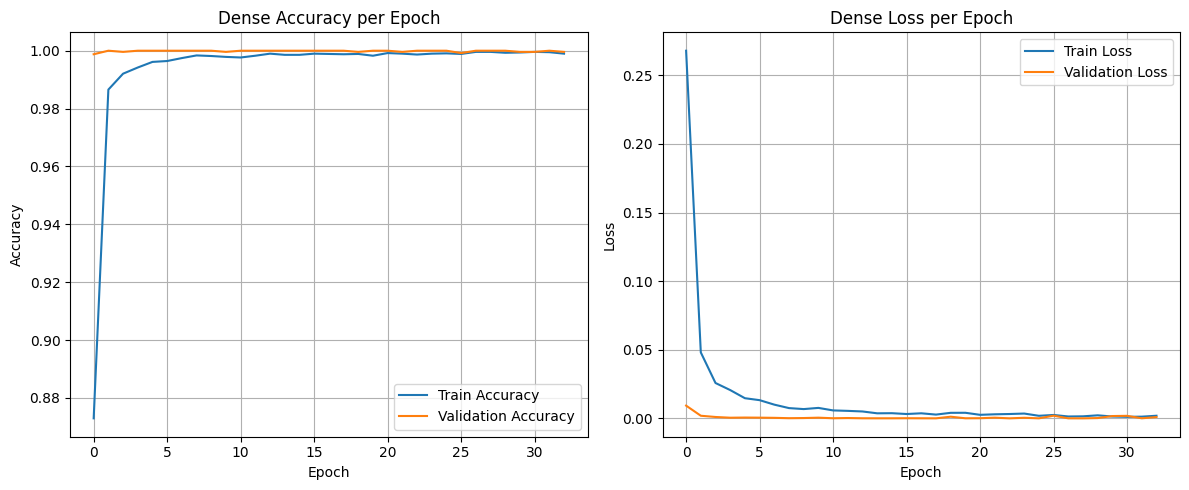


==== Summary for Dense (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


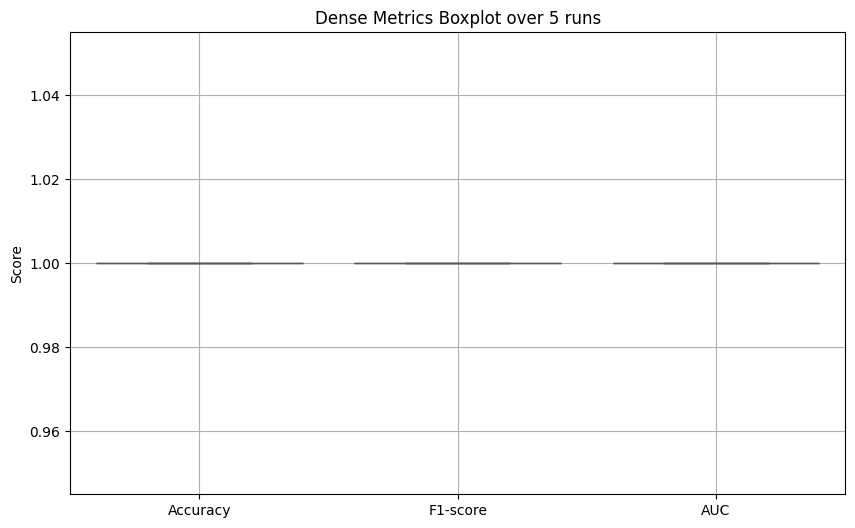


All run results saved to: /content/drive/MyDrive/UMN/results_all_models_convnext_tiny.csv


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'convnext_tiny'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/UMN'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8468 - loss: 0.4098 - val_accuracy: 0.9980 - val_loss: 0.0442
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9930 - loss: 0.0788 - val_accuracy: 0.9996 - val_loss: 0.0126
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9980 - loss: 0.0354 - val_accuracy: 0.9996 - val_loss: 0.0056
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9982 - loss: 0.0232 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9994 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9995 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 8.9616e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9997 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 5.3332e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - a

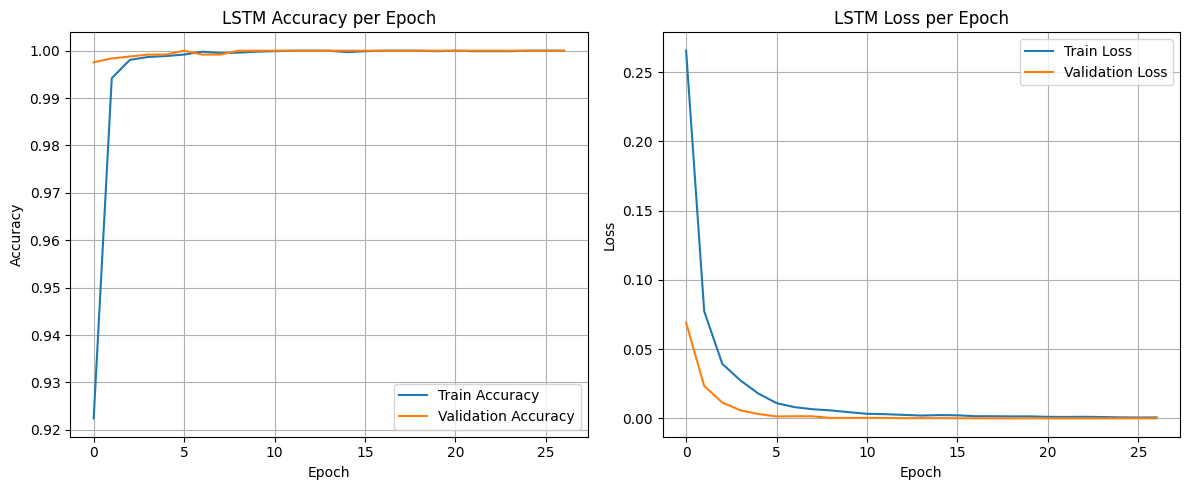


==== Summary for LSTM (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


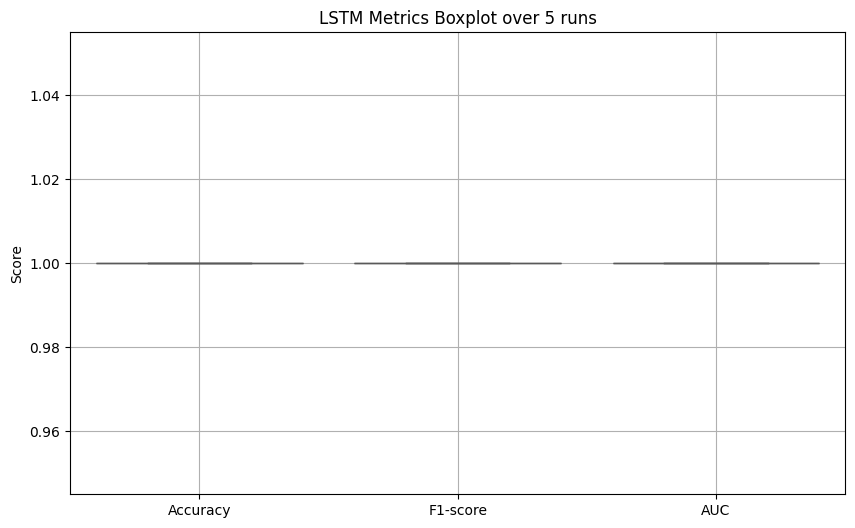


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7707 - loss: 0.4519 - val_accuracy: 0.9984 - val_loss: 0.0368
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9848 - loss: 0.0849 - val_accuracy: 0.9996 - val_loss: 0.0129
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9940 - loss: 0.0495 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9978 - loss: 0.0309 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9982 - loss: 0.0229 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9982 - loss: 0.0178 - val_accuracy: 1.0000 - val_loss: 7.4498e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9991 - loss: 0.0130 - val_accuracy: 1.0000 - val_loss: 4.5942e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - ac

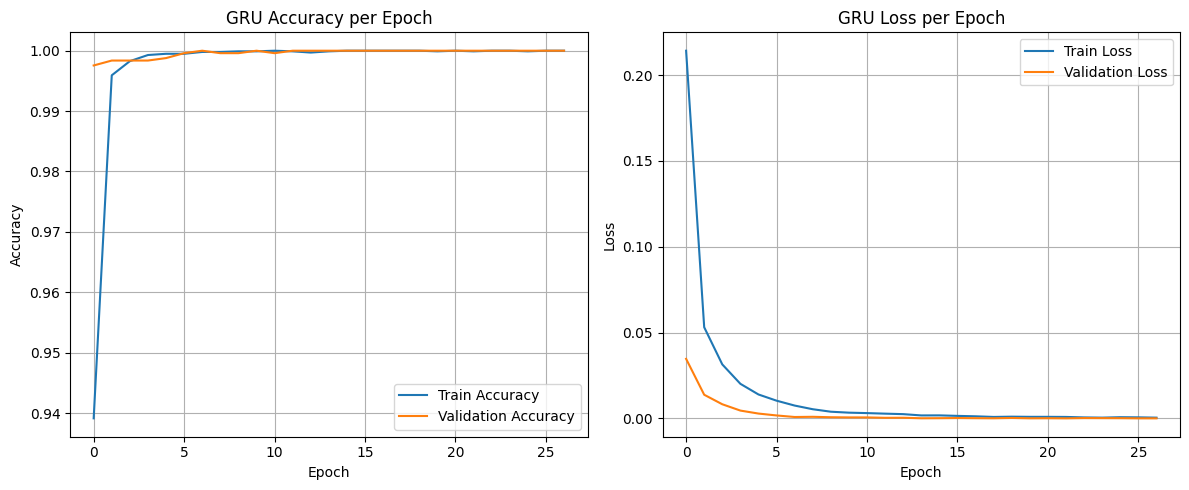


==== Summary for GRU (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


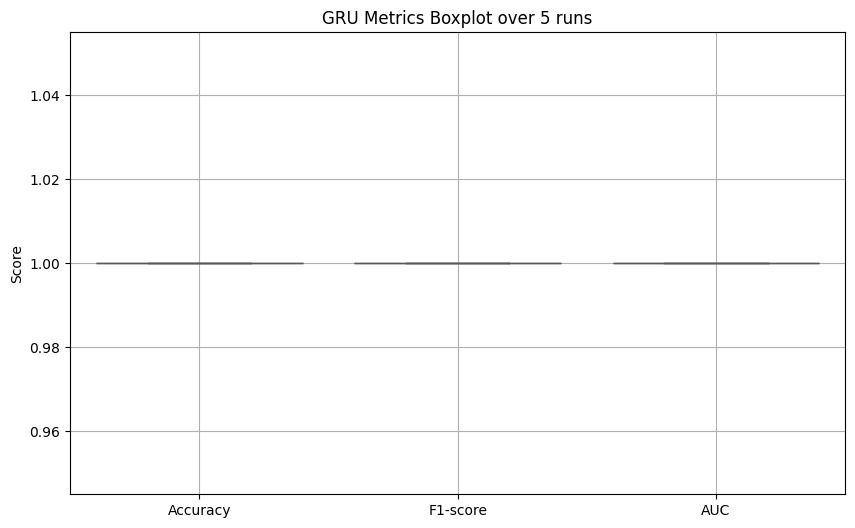


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6616 - loss: 0.6110 - val_accuracy: 0.9971 - val_loss: 0.1821
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9614 - loss: 0.2185 - val_accuracy: 0.9996 - val_loss: 0.0419
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9946 - loss: 0.0845 - val_accuracy: 0.9996 - val_loss: 0.0138
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9980 - loss: 0.0435 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9991 - loss: 0.0282 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9997 - loss: 0.0181 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9995 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 8.0820e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/

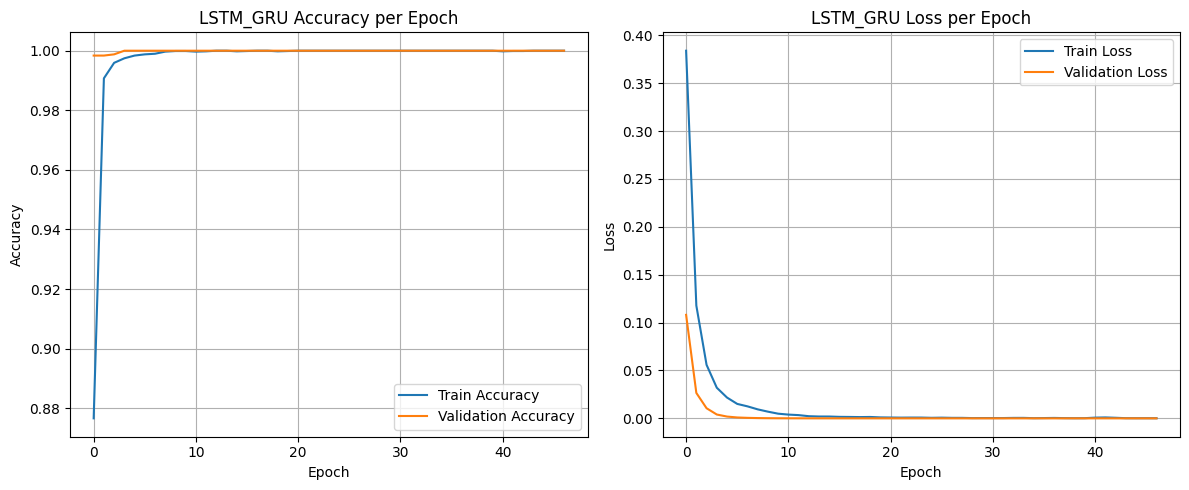


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


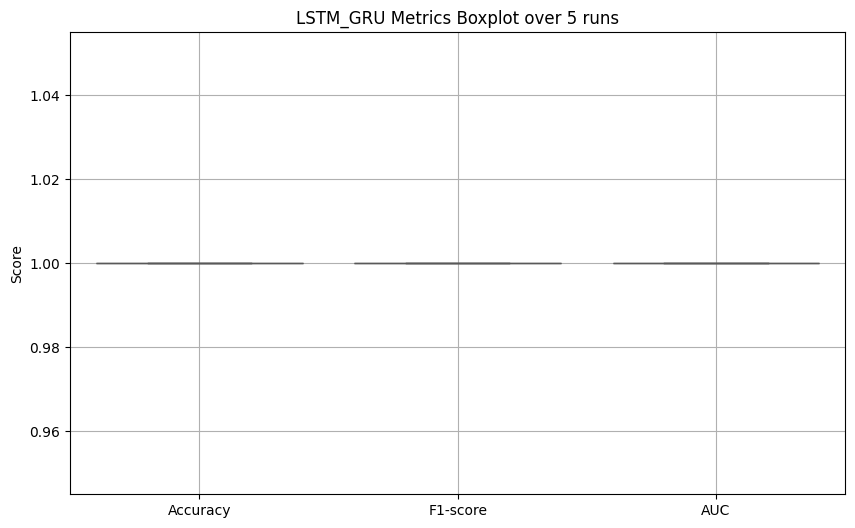


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7951 - loss: 0.4247 - val_accuracy: 0.9992 - val_loss: 0.0301
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9903 - loss: 0.0672 - val_accuracy: 0.9996 - val_loss: 0.0071
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9955 - loss: 0.0336 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9982 - loss: 0.0203 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9983 - loss: 0.0151 - val_accuracy: 1.0000 - val_loss: 9.5354e-04
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 6.1073e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9996 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 3.8203e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms

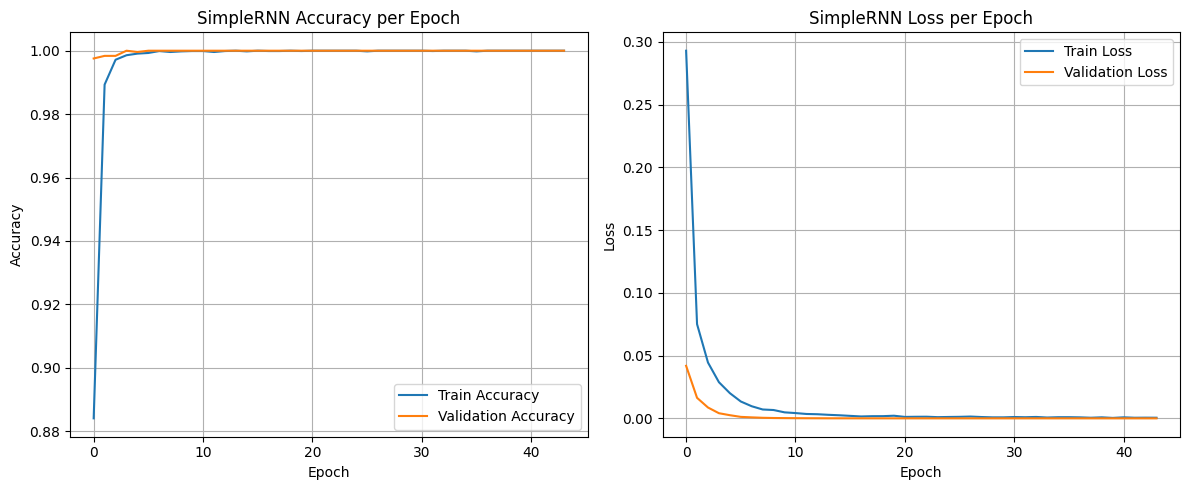


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


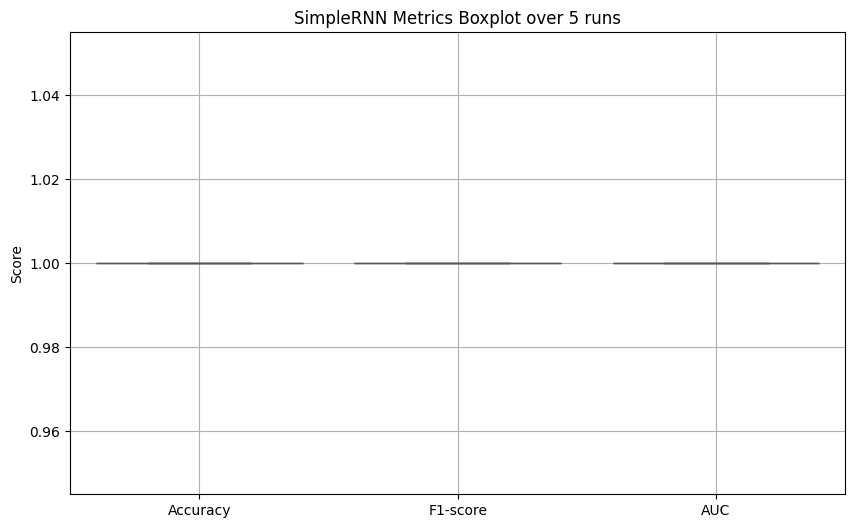


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8127 - loss: 0.3935 - val_accuracy: 0.9980 - val_loss: 0.0110
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9877 - loss: 0.0522 - val_accuracy: 0.9992 - val_loss: 0.0050
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9894 - loss: 0.0363 - val_accuracy: 0.9988 - val_loss: 0.0043
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9946 - loss: 0.0248 - val_accuracy: 0.9984 - val_loss: 0.0035
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9964 - loss: 0.0158 - val_accuracy: 0.9996 - val_loss: 0.0015
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9966 - loss: 0.0137 - val_accuracy: 0.9996 - val_loss: 8.9882e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9971 - loss: 0.0110 - val_accuracy: 0.9996 - val_loss: 0.0012
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accu

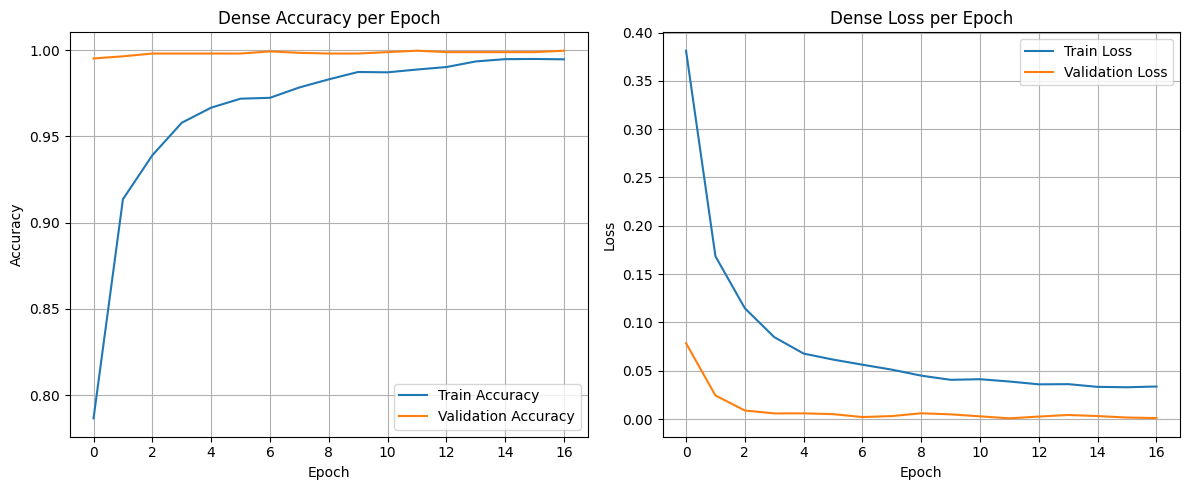


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.9995 ± 0.0004
Precision: 0.9996 ± 0.0004
Recall: 0.9993 ± 0.0007
F1: 0.9995 ± 0.0004
Auc: 1.0000 ± 0.0000


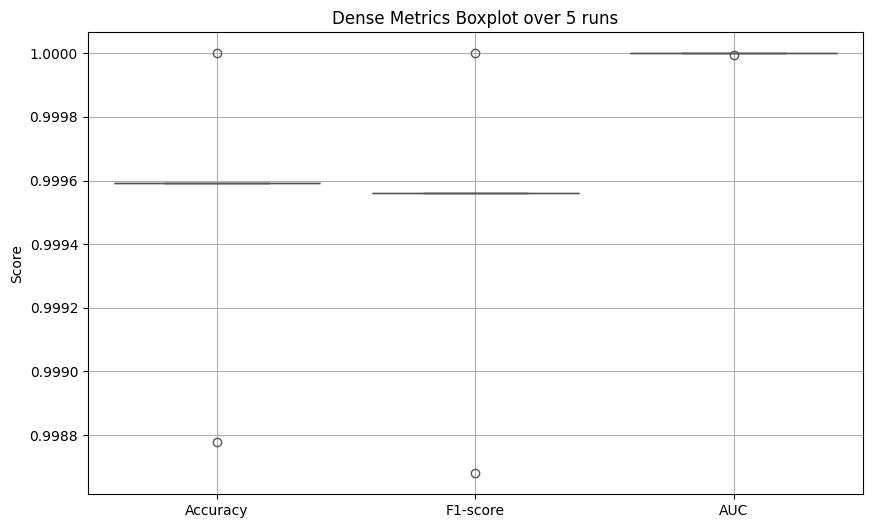


All run results saved to: /content/drive/MyDrive/UMN/results_all_models_repvgg_a0.csv


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'repvgg_a0'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/UMN'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8424 - loss: 0.3844 - val_accuracy: 0.9984 - val_loss: 0.0280
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9942 - loss: 0.0584 - val_accuracy: 0.9996 - val_loss: 0.0095
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9969 - loss: 0.0321 - val_accuracy: 0.9996 - val_loss: 0.0042
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9984 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9996 - loss: 0.0141 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9992 - loss: 0.0108 - val_accuracy: 1.0000 - val_loss: 7.0410e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9995 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 4.6760e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - a

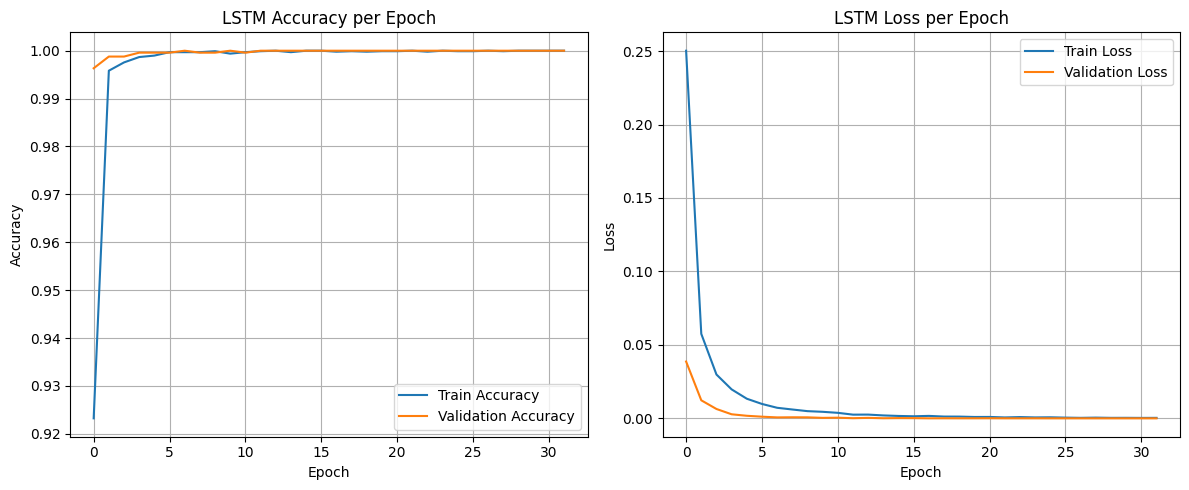


==== Summary for LSTM (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


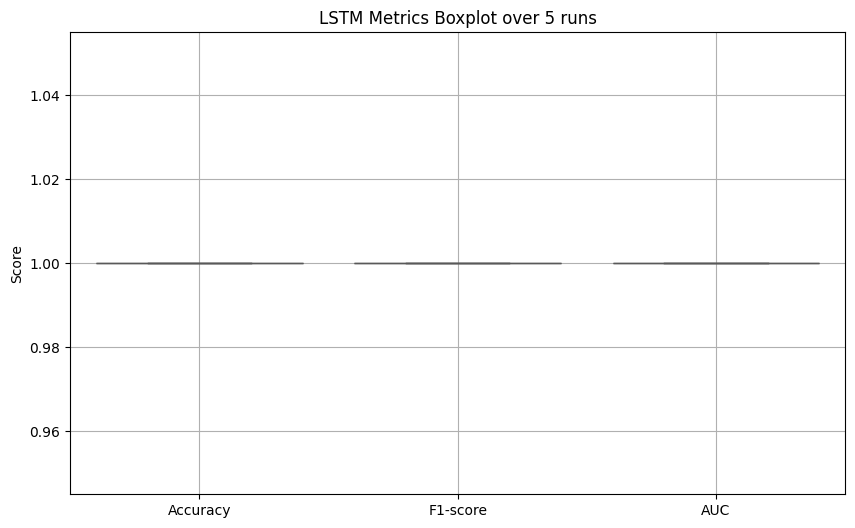


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8238 - loss: 0.3861 - val_accuracy: 0.9976 - val_loss: 0.0289
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9905 - loss: 0.0657 - val_accuracy: 0.9996 - val_loss: 0.0100
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9982 - loss: 0.0351 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9968 - loss: 0.0247 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9988 - loss: 0.0181 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9992 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 7.1968e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9994 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 4.6137e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

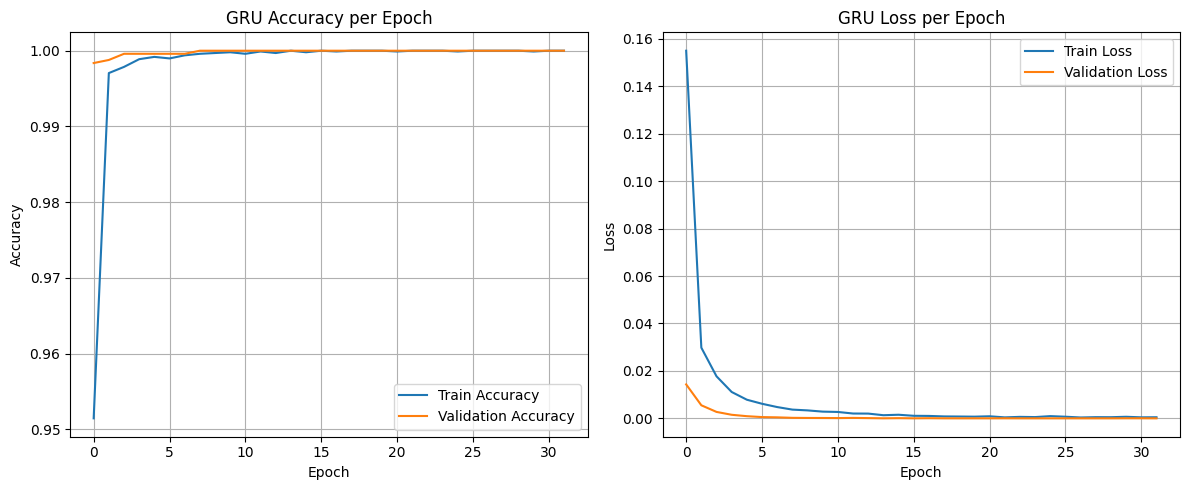


==== Summary for GRU (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


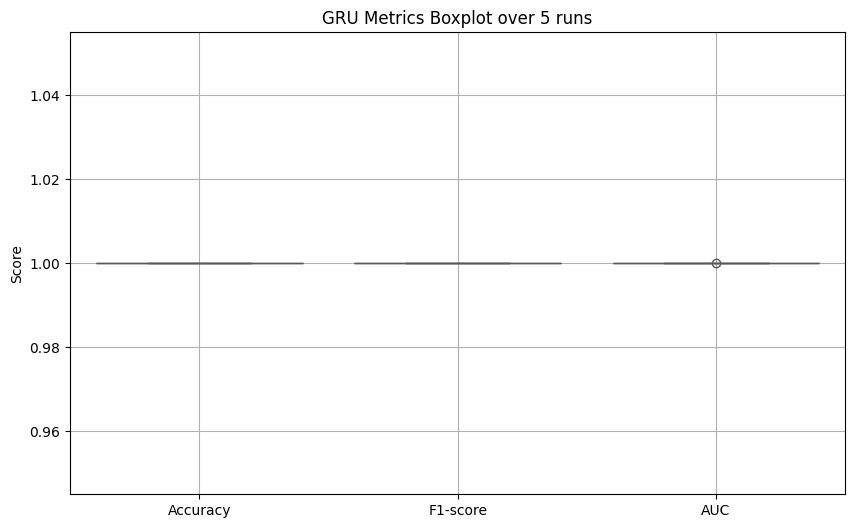


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7058 - loss: 0.5614 - val_accuracy: 0.9971 - val_loss: 0.0941
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9783 - loss: 0.1365 - val_accuracy: 0.9996 - val_loss: 0.0165
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9927 - loss: 0.0579 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9964 - loss: 0.0295 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9985 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 7.6073e-04
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9996 - loss: 0.0119 - val_accuracy: 1.0000 - val_loss: 3.5044e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9988 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 1.9009e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 

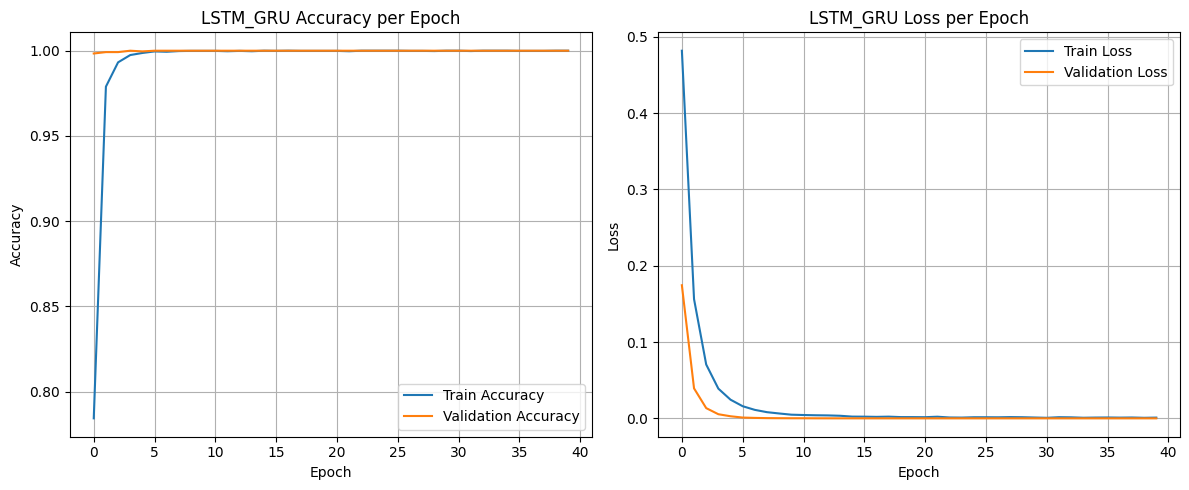


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


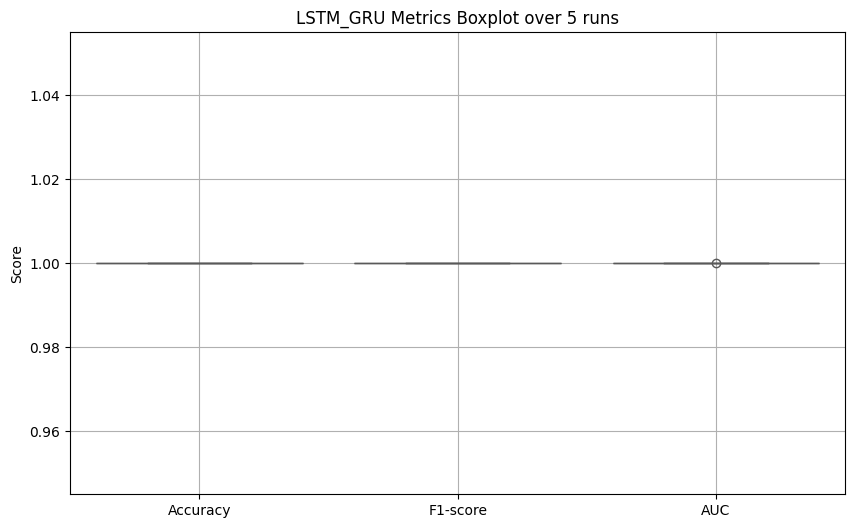


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8106 - loss: 0.3945 - val_accuracy: 0.9984 - val_loss: 0.0236
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9896 - loss: 0.0565 - val_accuracy: 0.9996 - val_loss: 0.0062
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9973 - loss: 0.0258 - val_accuracy: 0.9996 - val_loss: 0.0029
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9972 - loss: 0.0186 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9989 - loss: 0.0114 - val_accuracy: 1.0000 - val_loss: 8.0951e-04
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9986 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 4.6672e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9997 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 3.1438e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms

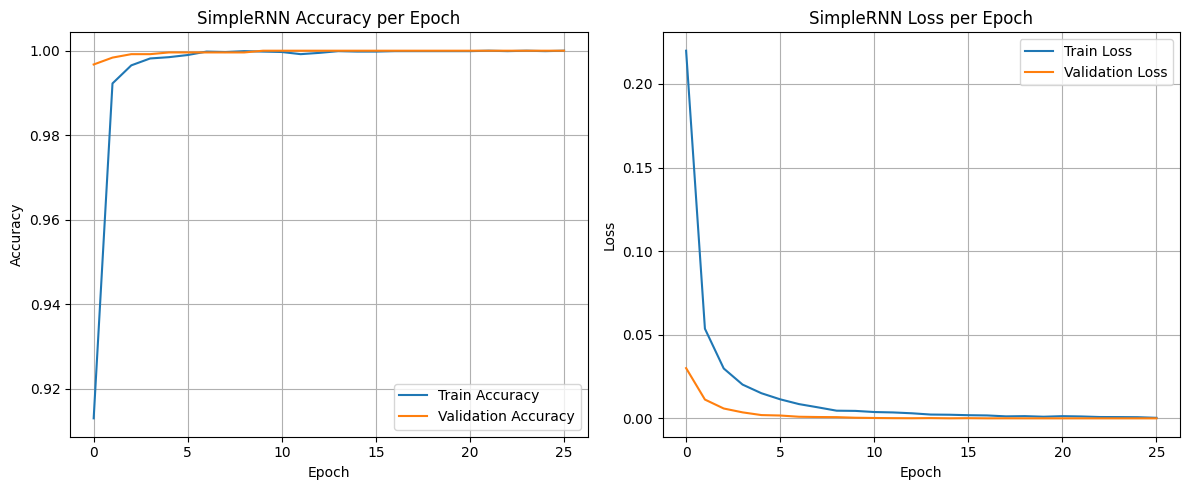


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


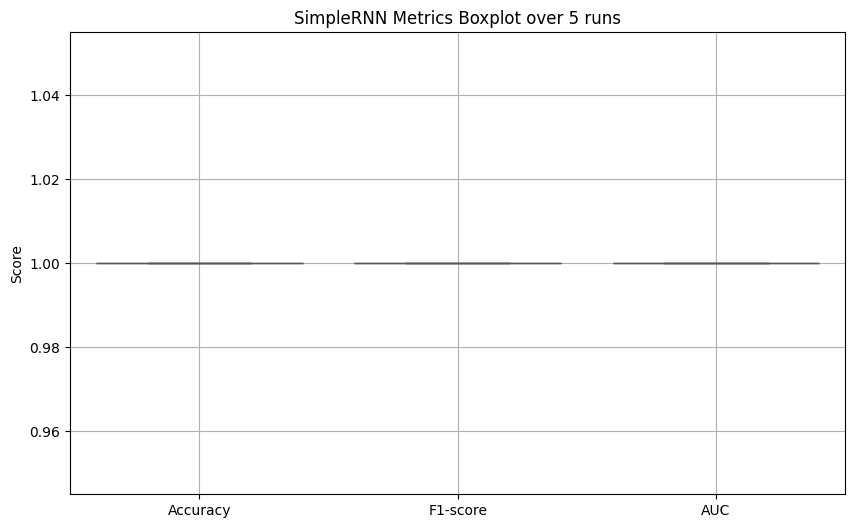


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6979 - loss: 0.5224 - val_accuracy: 0.9976 - val_loss: 0.0571
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9549 - loss: 0.1351 - val_accuracy: 0.9984 - val_loss: 0.0125
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9696 - loss: 0.0865 - val_accuracy: 0.9992 - val_loss: 0.0067
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9853 - loss: 0.0518 - val_accuracy: 0.9947 - val_loss: 0.0134
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9895 - loss: 0.0375 - val_accuracy: 0.9996 - val_loss: 0.0025
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9913 - loss: 0.0286 - val_accuracy: 0.9992 - val_loss: 0.0025
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9925 - loss: 0.0251 - val_accuracy: 0.9996 - val_loss: 0.0014
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

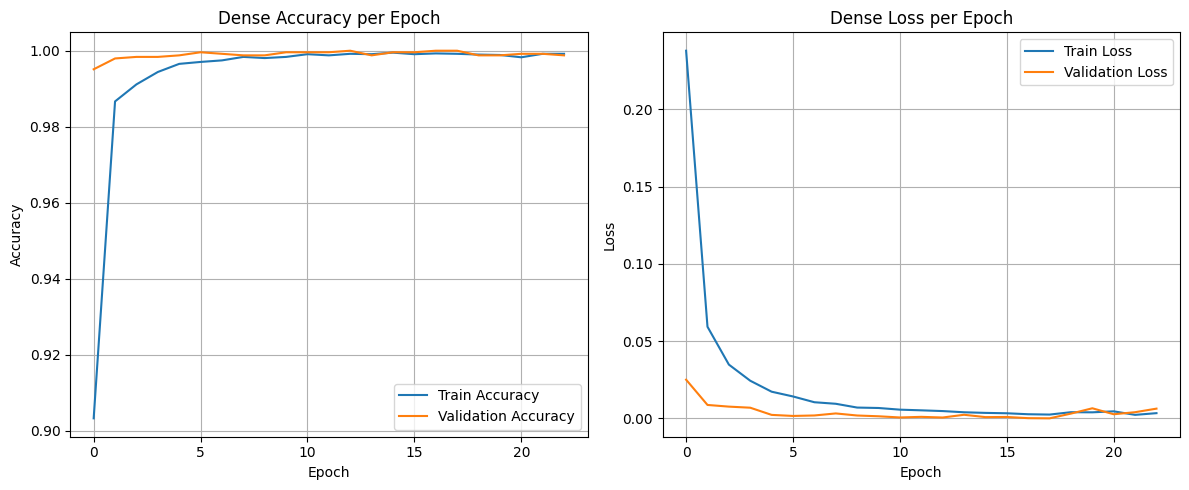


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.9999 ± 0.0002
Precision: 0.9998 ± 0.0004
Recall: 1.0000 ± 0.0000
F1: 0.9999 ± 0.0002
Auc: 1.0000 ± 0.0000


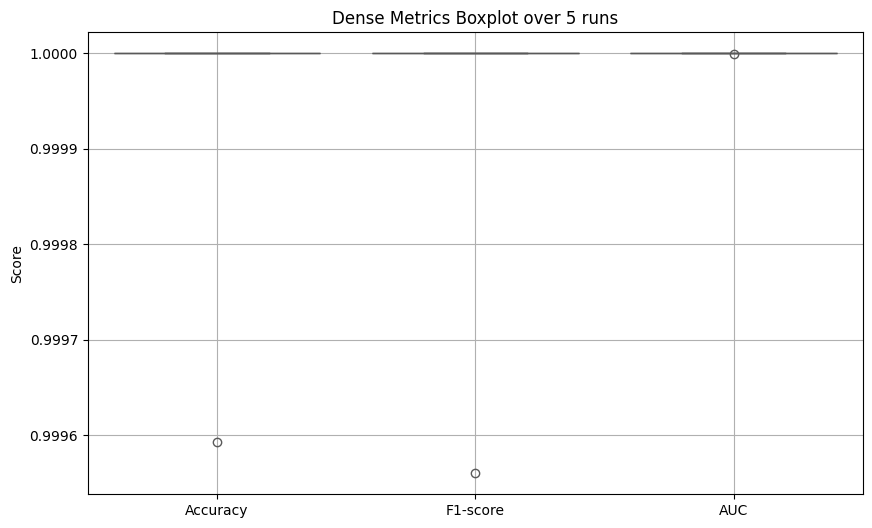


All run results saved to: /content/drive/MyDrive/UMN/results_all_models_mobileone_s0.csv


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'mobileone_s0'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/UMN'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7769 - loss: 0.5063 - val_accuracy: 0.9988 - val_loss: 0.1127
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9854 - loss: 0.1358 - val_accuracy: 0.9996 - val_loss: 0.0278
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9965 - loss: 0.0574 - val_accuracy: 1.0000 - val_loss: 0.0113
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9979 - loss: 0.0339 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9993 - loss: 0.0225 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9988 - loss: 0.0168 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9998 - loss: 0.0101 - val_accuracy: 1.0000 - val_loss: 9.4056e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accur

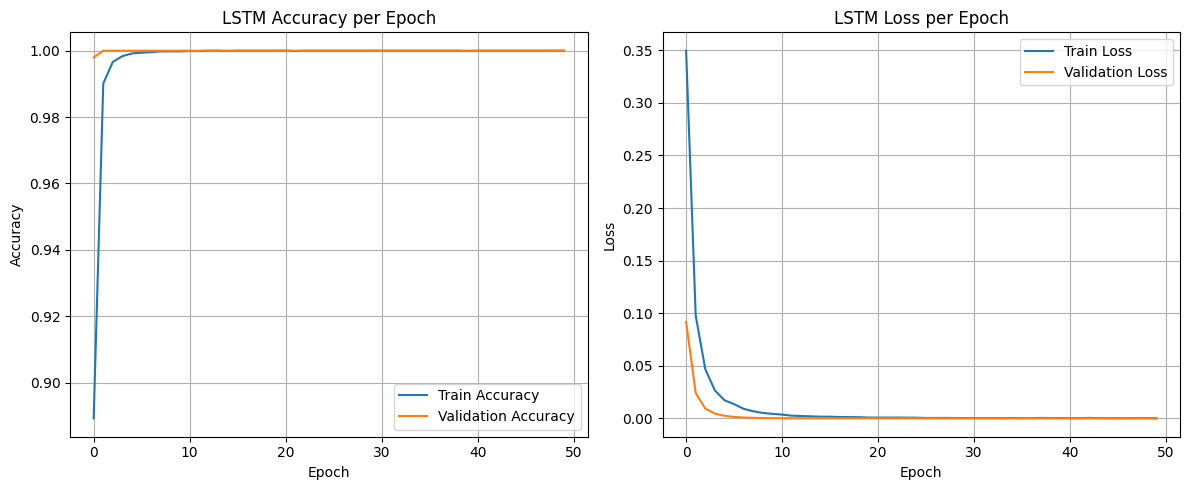


==== Summary for LSTM (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


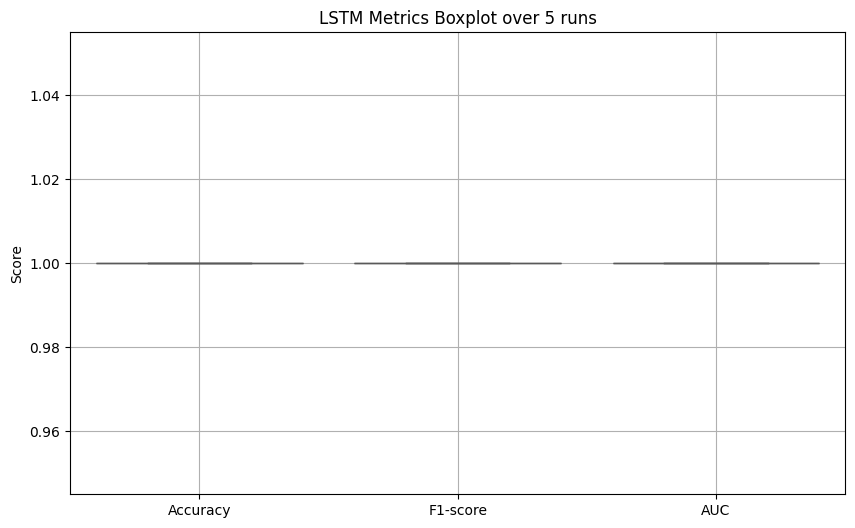


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8042 - loss: 0.4420 - val_accuracy: 0.9980 - val_loss: 0.0558
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9930 - loss: 0.0808 - val_accuracy: 0.9992 - val_loss: 0.0137
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9980 - loss: 0.0335 - val_accuracy: 0.9996 - val_loss: 0.0055
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9993 - loss: 0.0188 - val_accuracy: 0.9996 - val_loss: 0.0028
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9994 - loss: 0.0140 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9991 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 8.9827e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9997 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 5.3917e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - ac

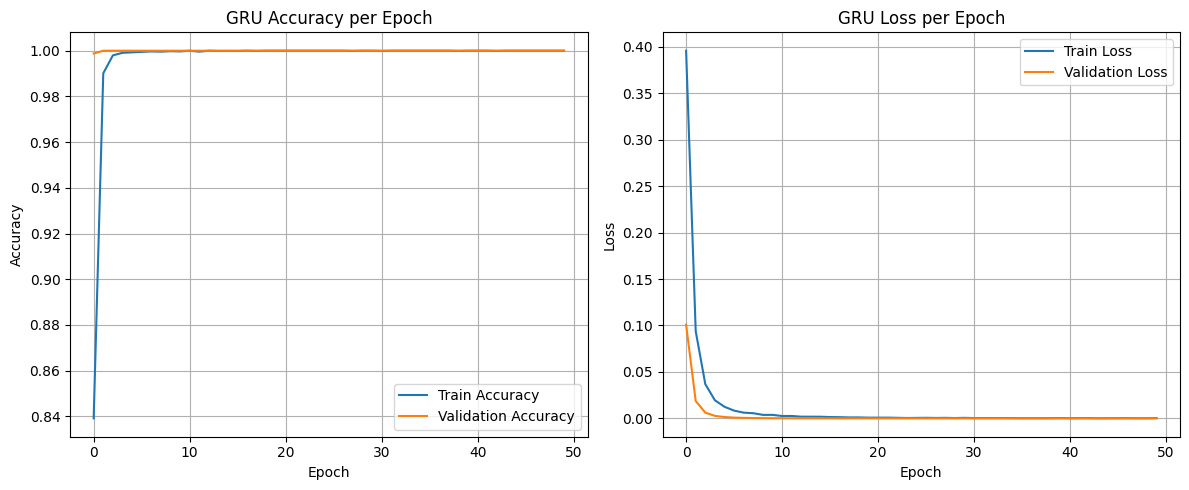


==== Summary for GRU (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


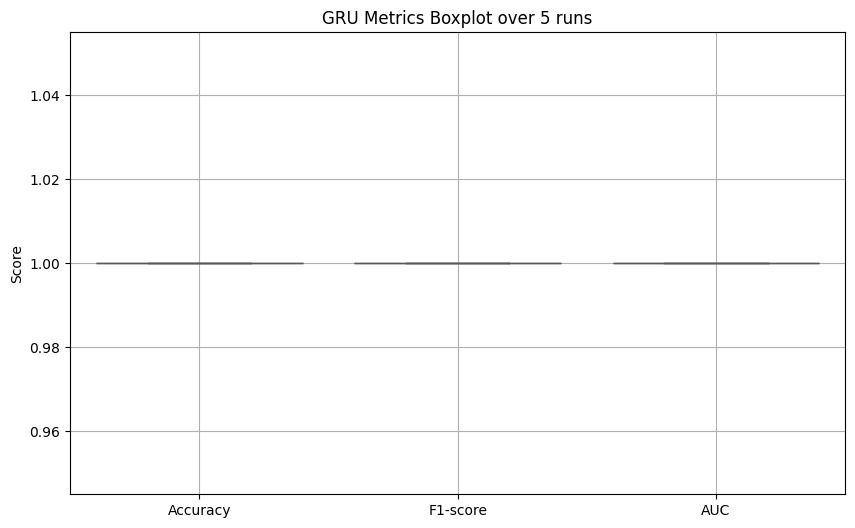


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6167 - loss: 0.6408 - val_accuracy: 0.9882 - val_loss: 0.2619
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9506 - loss: 0.2469 - val_accuracy: 0.9992 - val_loss: 0.0332
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9947 - loss: 0.0713 - val_accuracy: 0.9996 - val_loss: 0.0085
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9984 - loss: 0.0310 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9992 - loss: 0.0190 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9995 - loss: 0.0123 - val_accuracy: 1.0000 - val_loss: 6.3050e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9997 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 3.1739e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/ste

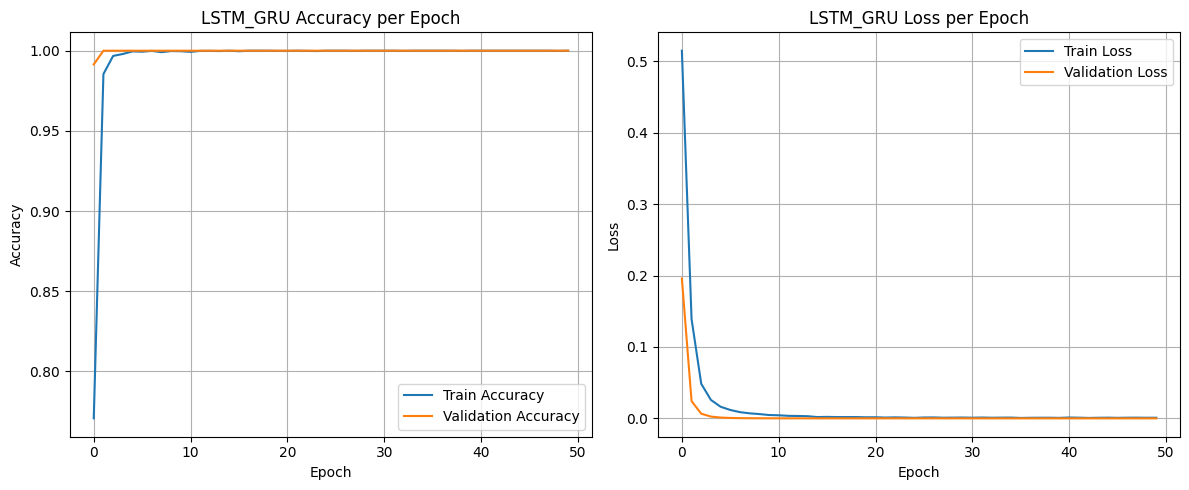


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


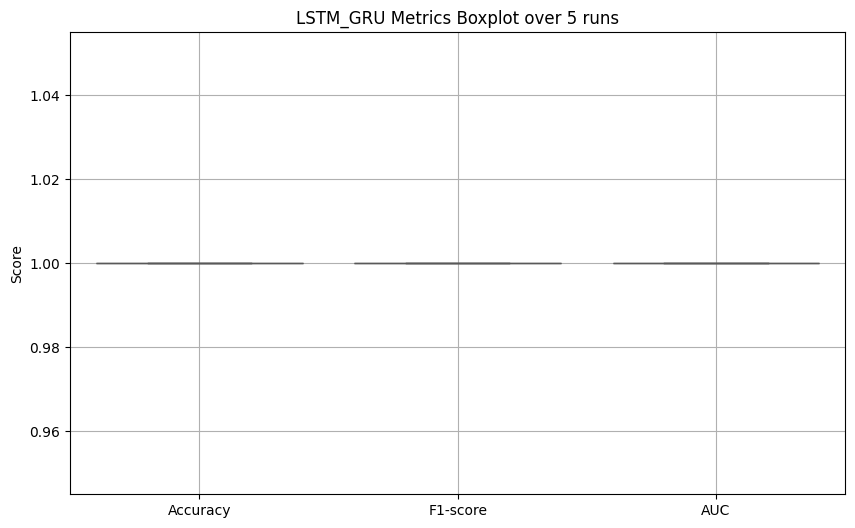


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7314 - loss: 0.5237 - val_accuracy: 0.9967 - val_loss: 0.0930
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9730 - loss: 0.1407 - val_accuracy: 0.9988 - val_loss: 0.0311
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9920 - loss: 0.0705 - val_accuracy: 0.9996 - val_loss: 0.0127
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9970 - loss: 0.0405 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9983 - loss: 0.0279 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - loss: 0.0193 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9995 - loss: 0.0133 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accu

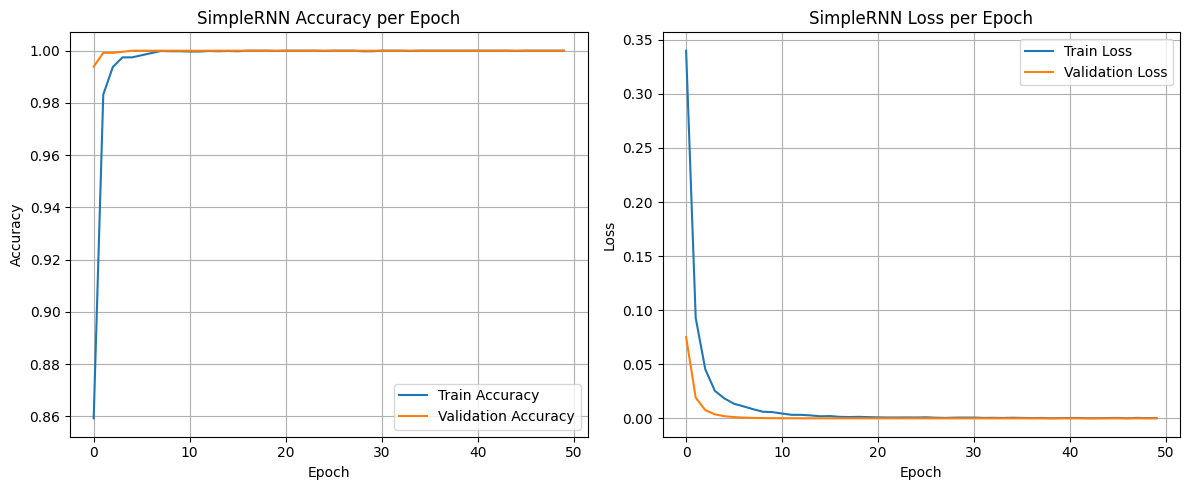


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 0.9999 ± 0.0002
Precision: 1.0000 ± 0.0000
Recall: 0.9998 ± 0.0004
F1: 0.9999 ± 0.0002
Auc: 1.0000 ± 0.0000


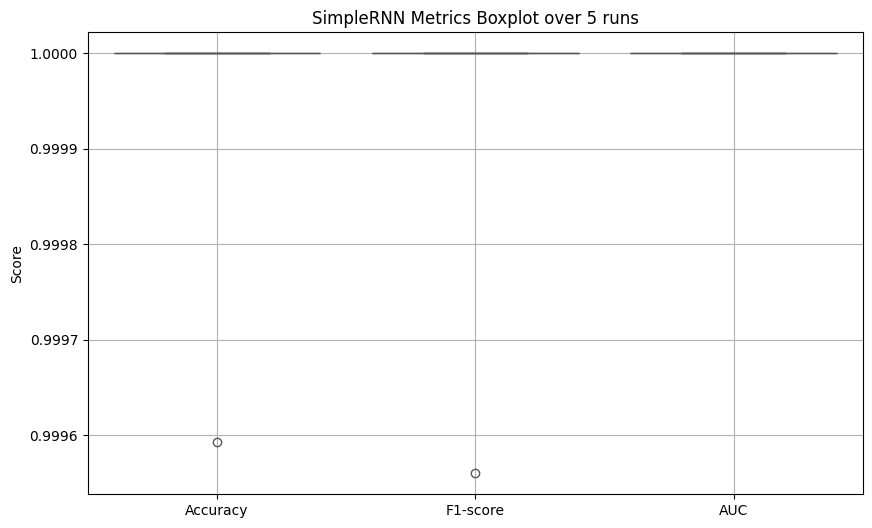


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7377 - loss: 0.4884 - val_accuracy: 0.9976 - val_loss: 0.0374
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.1000 - val_accuracy: 0.9984 - val_loss: 0.0106
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0544 - val_accuracy: 0.9988 - val_loss: 0.0050
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9939 - loss: 0.0344 - val_accuracy: 0.9992 - val_loss: 0.0025
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9962 - loss: 0.0212 - val_accuracy: 0.9996 - val_loss: 0.0015
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9970 - loss: 0.0176 - val_accuracy: 0.9992 - val_loss: 0.0014
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9976 - loss: 0.0153 - val_accuracy: 0.9996 - val_loss: 0.0014
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

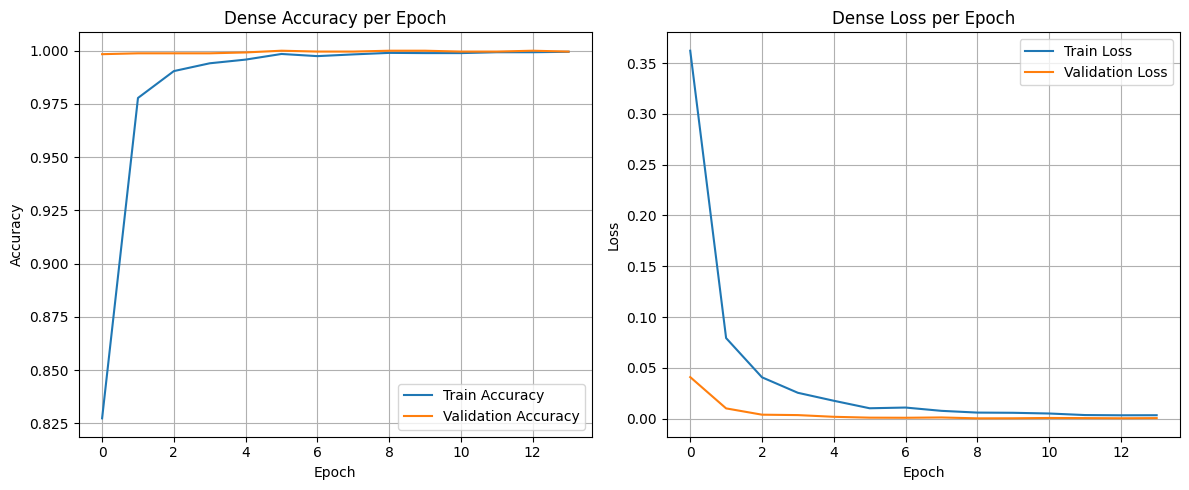


==== Summary for Dense (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


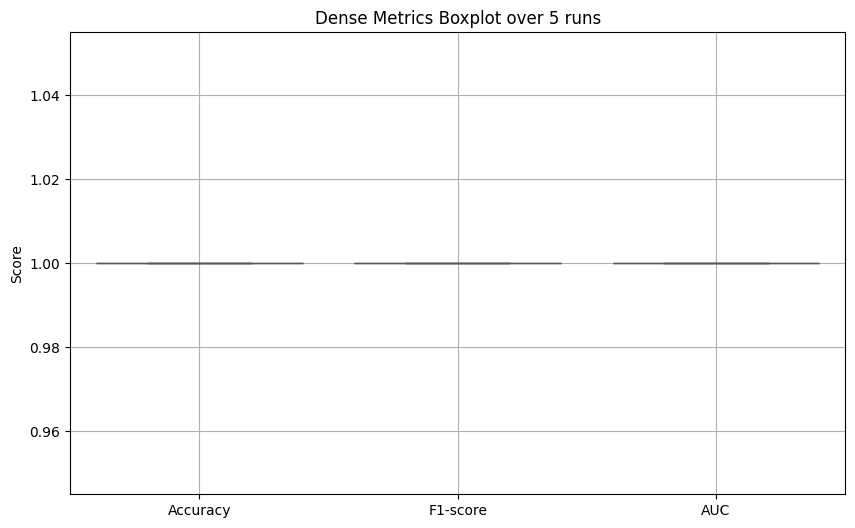


All run results saved to: /content/drive/MyDrive/UMN/results_all_models_poolformer_s12.csv


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'poolformer_s12'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/UMN'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7345 - loss: 0.5385 - val_accuracy: 0.9980 - val_loss: 0.1101
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9639 - loss: 0.1456 - val_accuracy: 0.9988 - val_loss: 0.0344
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9901 - loss: 0.0763 - val_accuracy: 0.9992 - val_loss: 0.0152
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9956 - loss: 0.0489 - val_accuracy: 0.9992 - val_loss: 0.0082
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9975 - loss: 0.0316 - val_accuracy: 0.9996 - val_loss: 0.0047
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9993 - loss: 0.0225 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9983 - loss: 0.0183 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy:

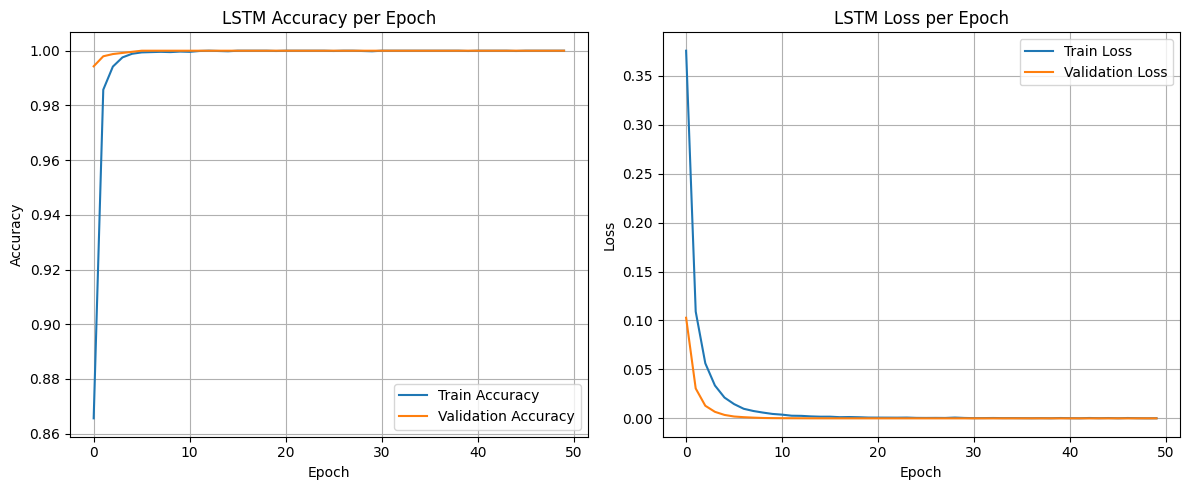


==== Summary for LSTM (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


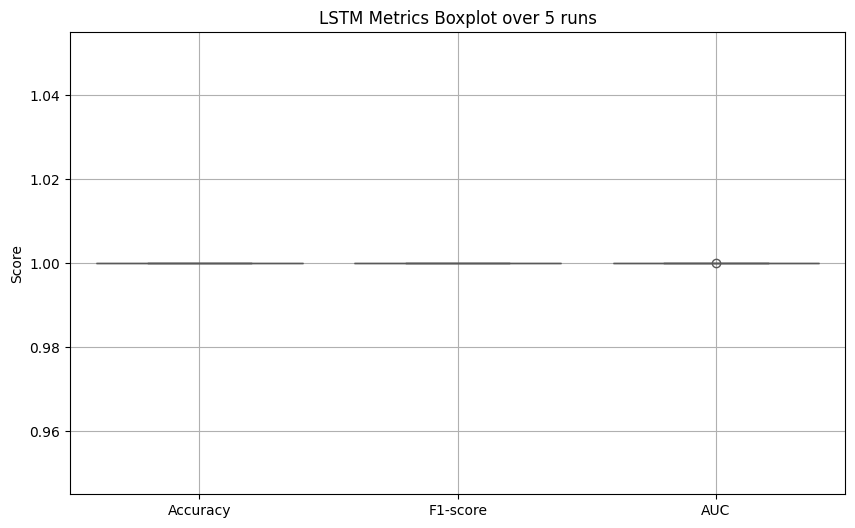


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8232 - loss: 0.4383 - val_accuracy: 0.9980 - val_loss: 0.0475
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9923 - loss: 0.0773 - val_accuracy: 0.9980 - val_loss: 0.0133
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9970 - loss: 0.0335 - val_accuracy: 0.9988 - val_loss: 0.0058
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9990 - loss: 0.0204 - val_accuracy: 0.9992 - val_loss: 0.0032
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9994 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9997 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9993 - loss: 0.0077 - val_accuracy: 0.9996 - val_loss: 8.6366e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accura

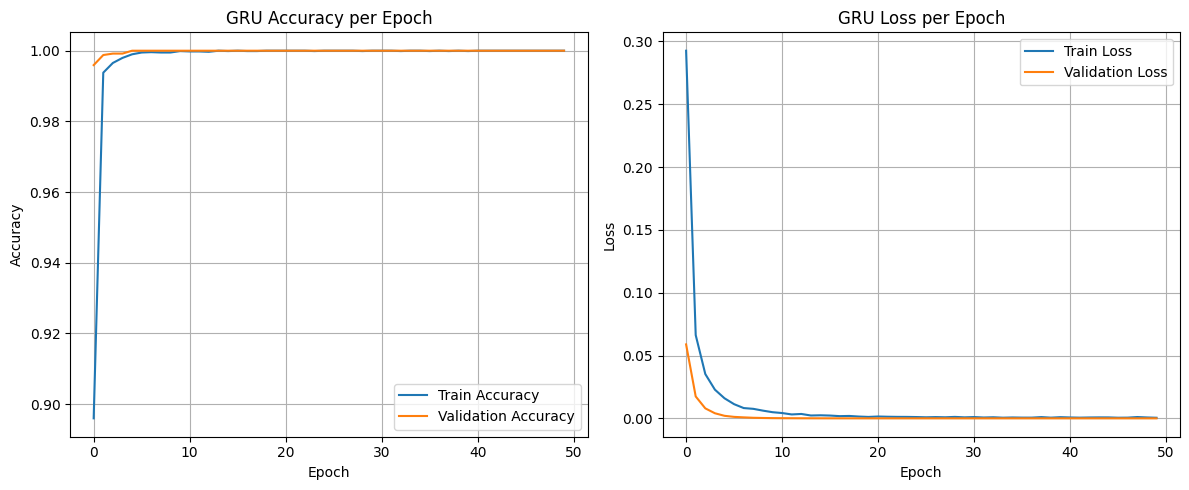


==== Summary for GRU (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


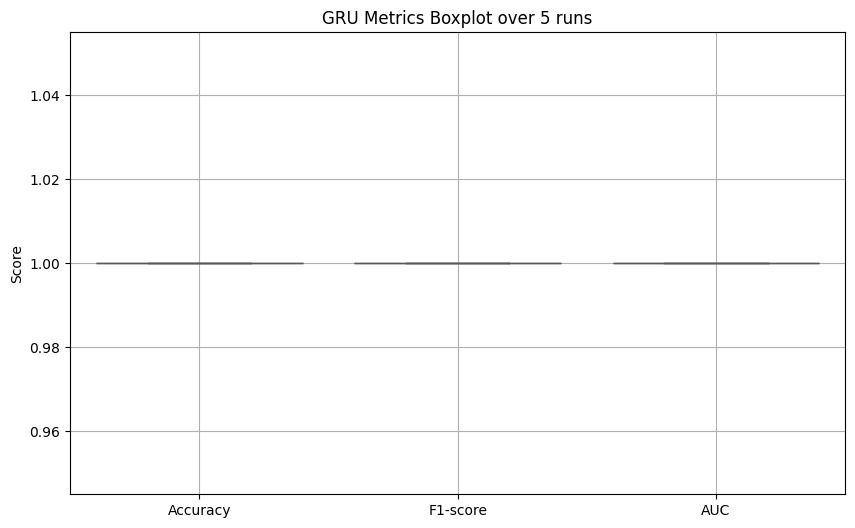


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6542 - loss: 0.6131 - val_accuracy: 0.9947 - val_loss: 0.1242
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9780 - loss: 0.1554 - val_accuracy: 0.9980 - val_loss: 0.0198
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9948 - loss: 0.0558 - val_accuracy: 0.9996 - val_loss: 0.0062
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9976 - loss: 0.0320 - val_accuracy: 0.9992 - val_loss: 0.0037
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9981 - loss: 0.0193 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9991 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 6.1074e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9986 - loss: 0.0108 - val_accuracy: 1.0000 - val_loss: 3.8359e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/ste

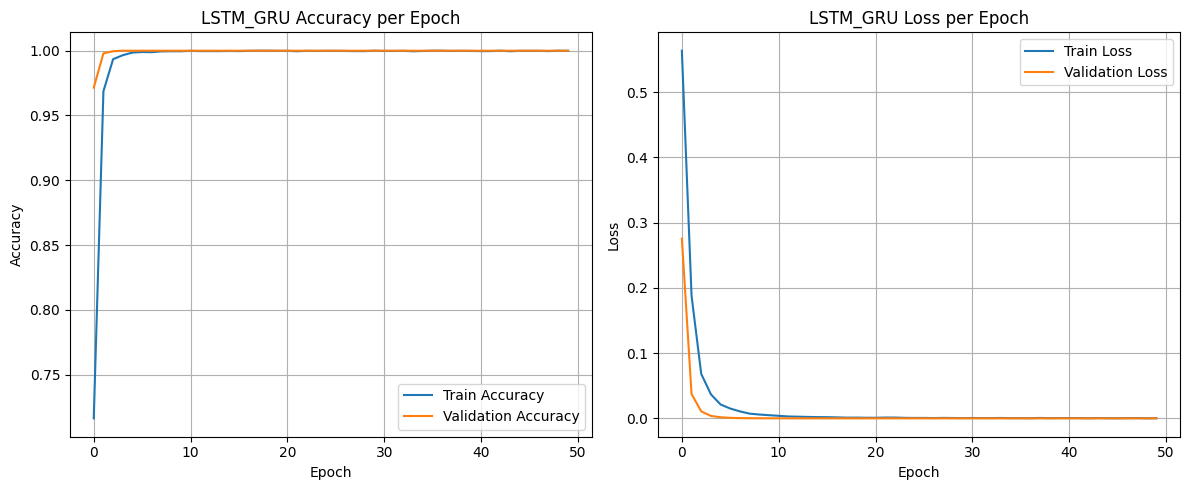


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


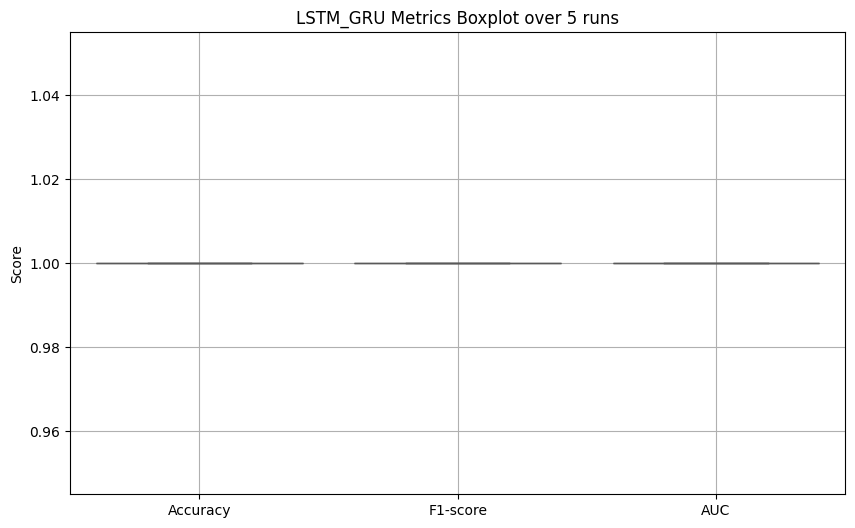


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7149 - loss: 0.5097 - val_accuracy: 0.9923 - val_loss: 0.0657
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9823 - loss: 0.0994 - val_accuracy: 0.9980 - val_loss: 0.0205
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9948 - loss: 0.0480 - val_accuracy: 0.9984 - val_loss: 0.0090
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9960 - loss: 0.0301 - val_accuracy: 0.9996 - val_loss: 0.0048
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9976 - loss: 0.0200 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9974 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9994 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accu

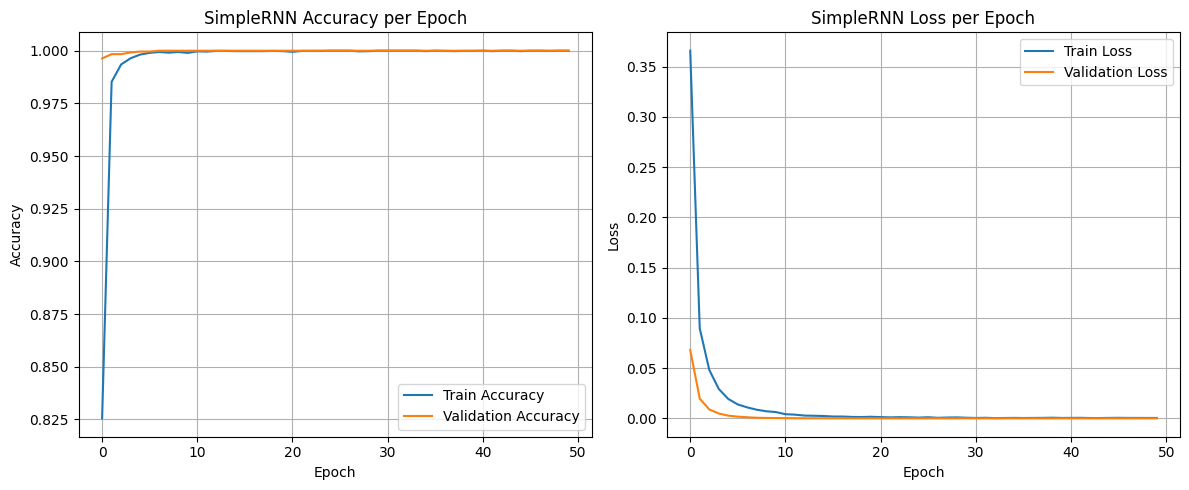


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


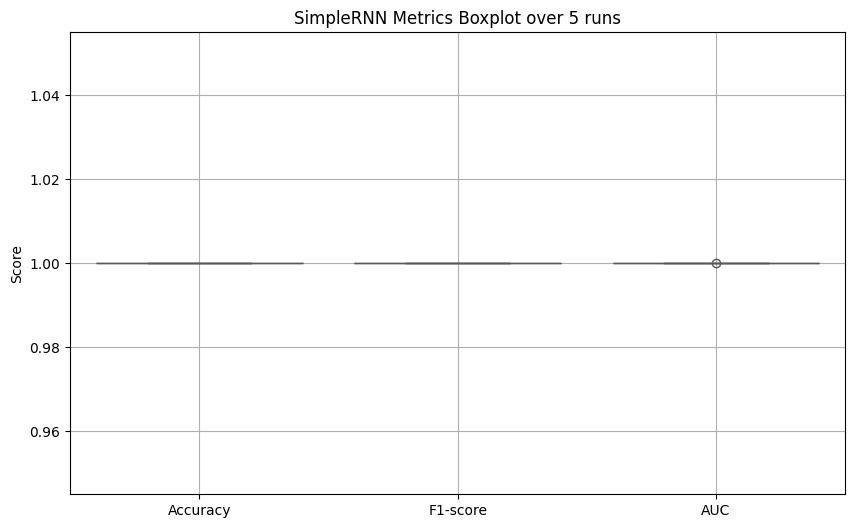


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7729 - loss: 0.4283 - val_accuracy: 0.9967 - val_loss: 0.0219
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9827 - loss: 0.0661 - val_accuracy: 0.9976 - val_loss: 0.0072
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9916 - loss: 0.0335 - val_accuracy: 0.9988 - val_loss: 0.0030
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9961 - loss: 0.0202 - val_accuracy: 0.9992 - val_loss: 0.0017
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9958 - loss: 0.0164 - val_accuracy: 0.9988 - val_loss: 0.0019
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9984 - loss: 0.0095 - val_accuracy: 0.9988 - val_loss: 0.0023
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0068 - val_accuracy: 0.9988 - val_loss: 0.0013
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

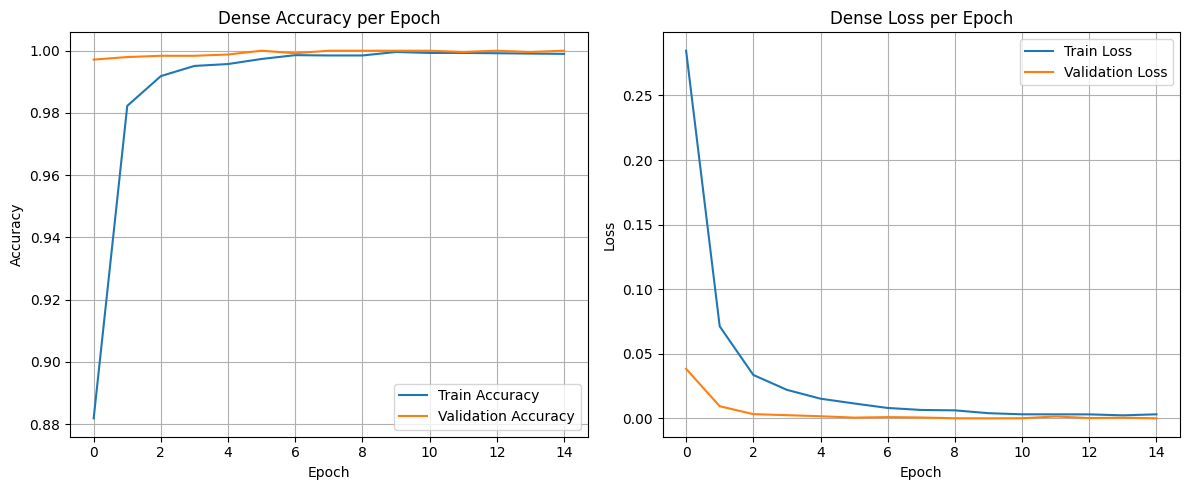


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.9999 ± 0.0002
Precision: 1.0000 ± 0.0000
Recall: 0.9998 ± 0.0004
F1: 0.9999 ± 0.0002
Auc: 1.0000 ± 0.0000


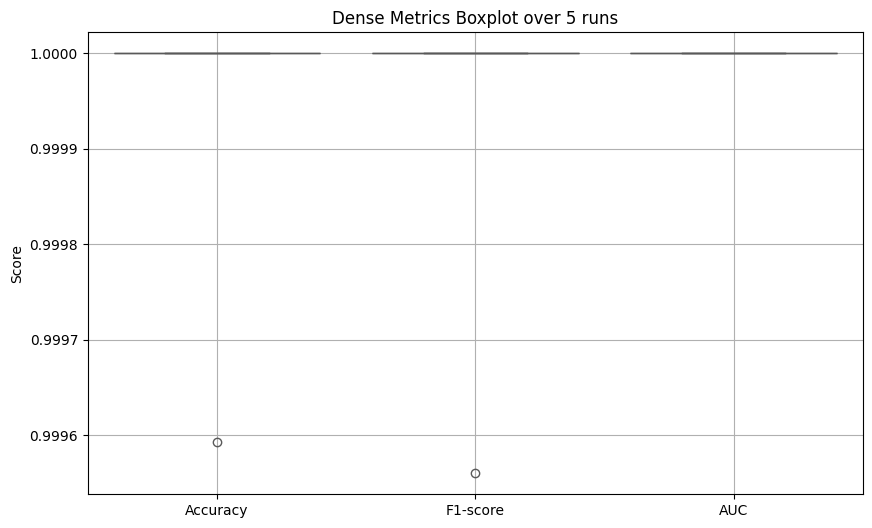


All run results saved to: /content/drive/MyDrive/UMN/results_all_models_maxvit_tiny_tf_224.csv


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'maxvit_tiny_tf_224'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/UMN'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()



==== Training model: LSTM ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7989 - loss: 0.4468 - val_accuracy: 0.9984 - val_loss: 0.0405
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9932 - loss: 0.0677 - val_accuracy: 0.9996 - val_loss: 0.0105
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9973 - loss: 0.0325 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9972 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9989 - loss: 0.0144 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9986 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 7.9774e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9986 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 4.6840e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - a

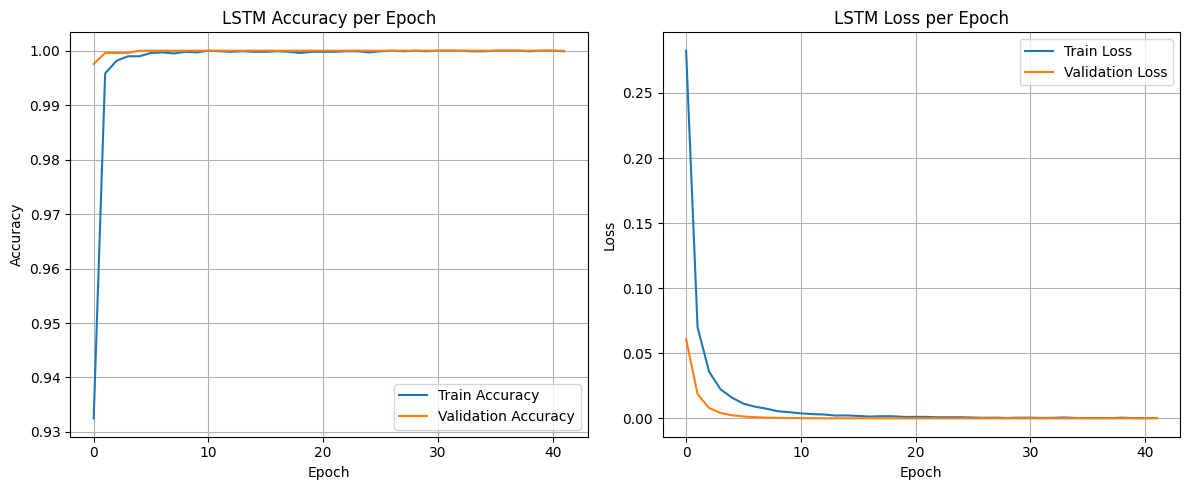


==== Summary for LSTM (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


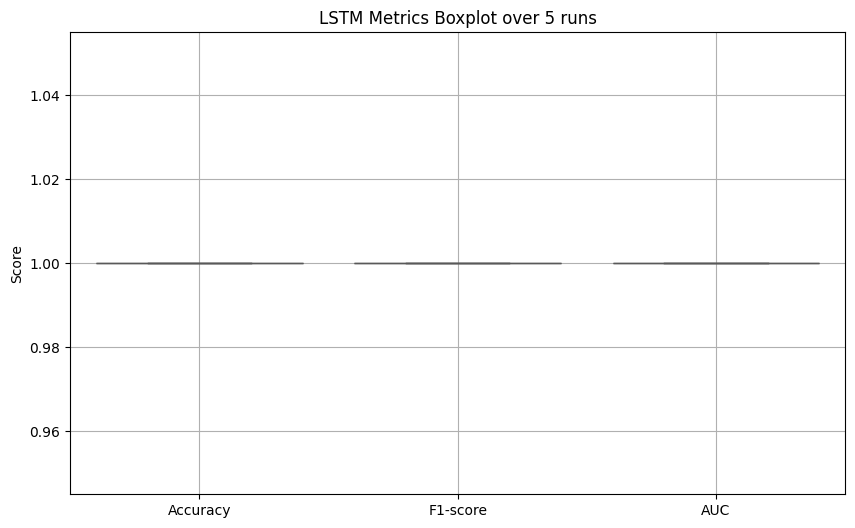


==== Training model: GRU ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8371 - loss: 0.4136 - val_accuracy: 0.9988 - val_loss: 0.0410
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9955 - loss: 0.0635 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9987 - loss: 0.0287 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9988 - loss: 0.0165 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9991 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9995 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 6.9945e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9999 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 4.1669e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

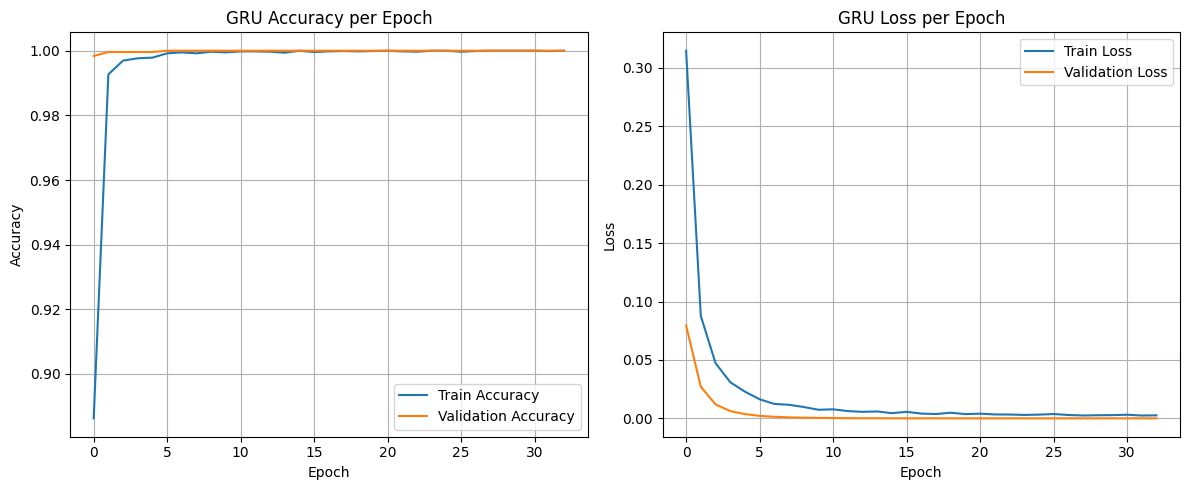


==== Summary for GRU (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


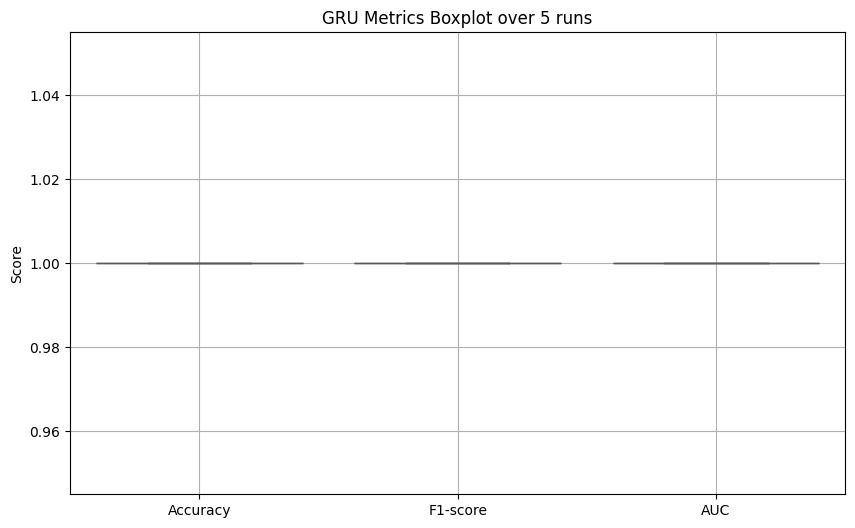


==== Training model: LSTM_GRU ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7098 - loss: 0.5629 - val_accuracy: 0.9963 - val_loss: 0.1000
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9780 - loss: 0.1400 - val_accuracy: 1.0000 - val_loss: 0.0146
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9964 - loss: 0.0457 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9981 - loss: 0.0242 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9989 - loss: 0.0147 - val_accuracy: 1.0000 - val_loss: 6.8922e-04
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9997 - loss: 0.0091 - val_accuracy: 1.0000 - val_loss: 3.6709e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9996 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 2.0226e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 

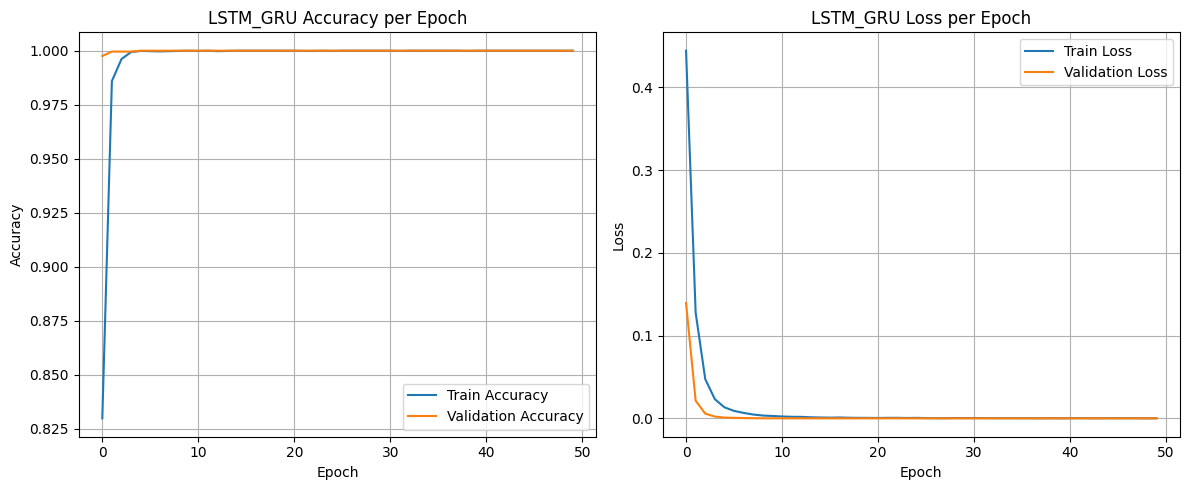


==== Summary for LSTM_GRU (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


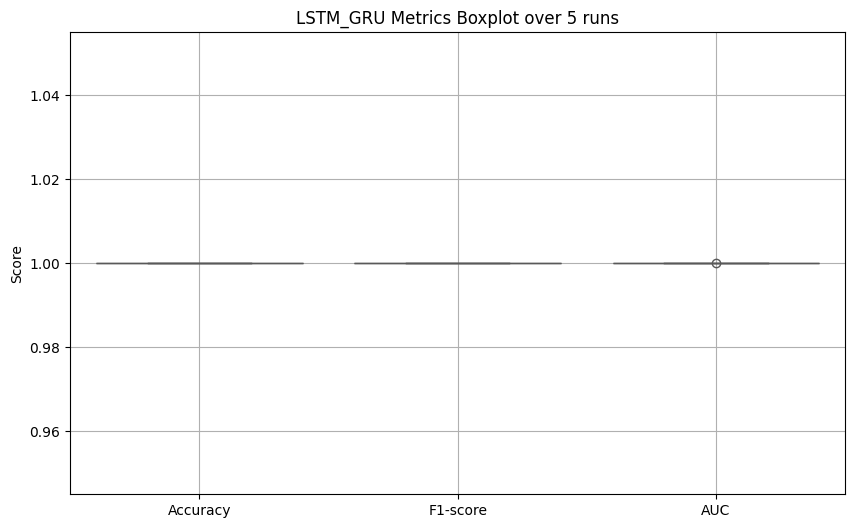


==== Training model: SimpleRNN ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7458 - loss: 0.4938 - val_accuracy: 0.9951 - val_loss: 0.0957
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9684 - loss: 0.1498 - val_accuracy: 0.9996 - val_loss: 0.0357
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9926 - loss: 0.0718 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - loss: 0.0351 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9997 - loss: 0.0220 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9995 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9998 - loss: 0.0097 - val_accuracy: 1.0000 - val_loss: 8.9433e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

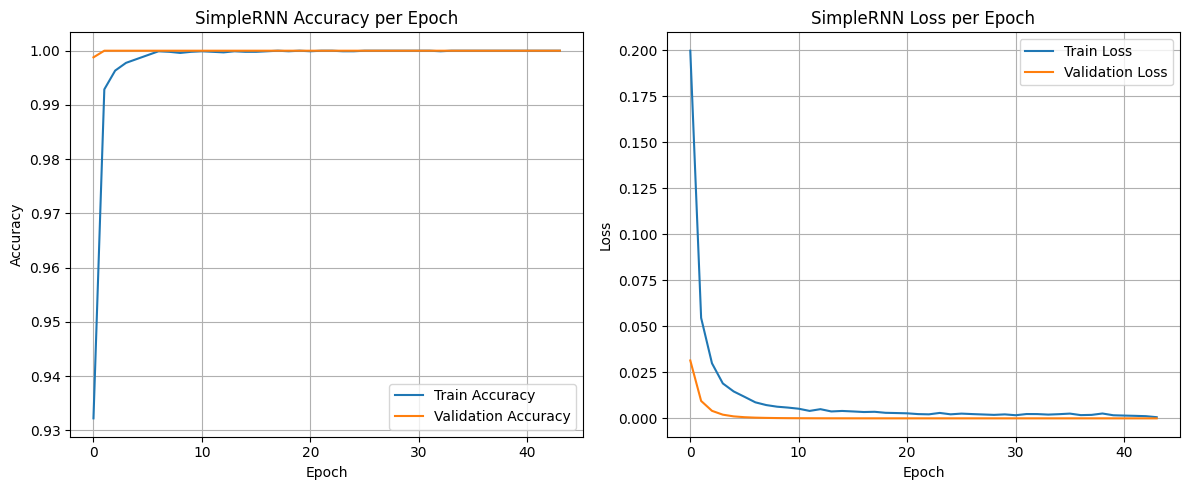


==== Summary for SimpleRNN (over 5 runs) ====
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1: 1.0000 ± 0.0000
Auc: 1.0000 ± 0.0000


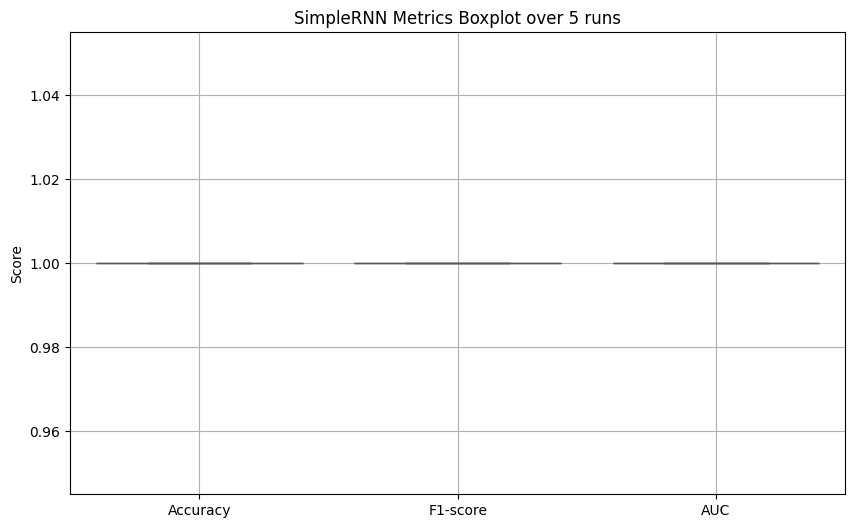


==== Training model: Dense ====
 Run 1/5
Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7843 - loss: 0.4372 - val_accuracy: 0.9988 - val_loss: 0.0202
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9749 - loss: 0.0823 - val_accuracy: 0.9992 - val_loss: 0.0056
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9907 - loss: 0.0430 - val_accuracy: 0.9996 - val_loss: 0.0028
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9926 - loss: 0.0293 - val_accuracy: 0.9996 - val_loss: 0.0013
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9969 - loss: 0.0159 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9960 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 3.1400e-04
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9979 - loss: 0.0096 - val_accuracy: 0.9996 - val_loss: 8.8708e-04
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

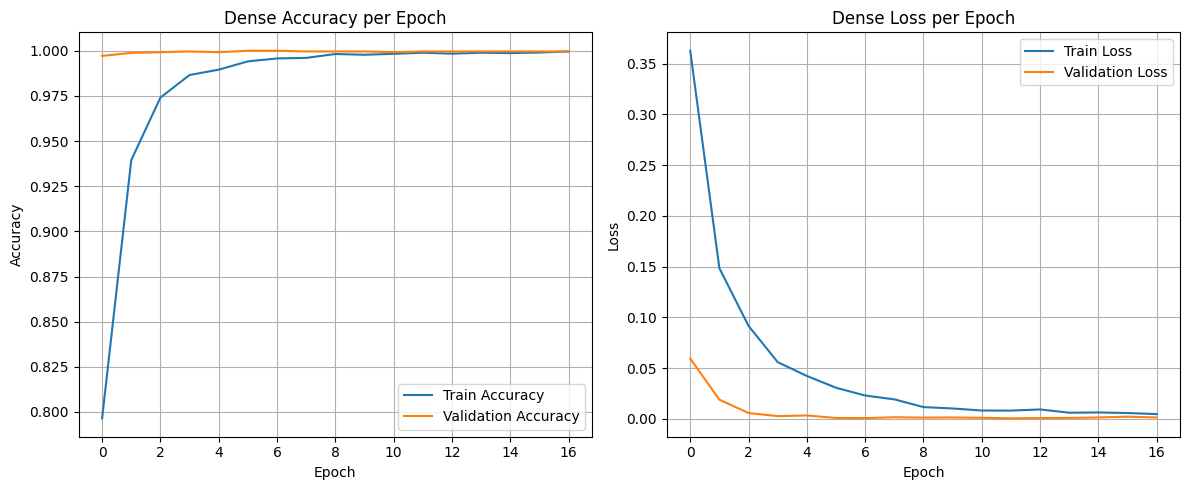


==== Summary for Dense (over 5 runs) ====
Accuracy: 0.9999 ± 0.0002
Precision: 1.0000 ± 0.0000
Recall: 0.9998 ± 0.0004
F1: 0.9999 ± 0.0002
Auc: 1.0000 ± 0.0000


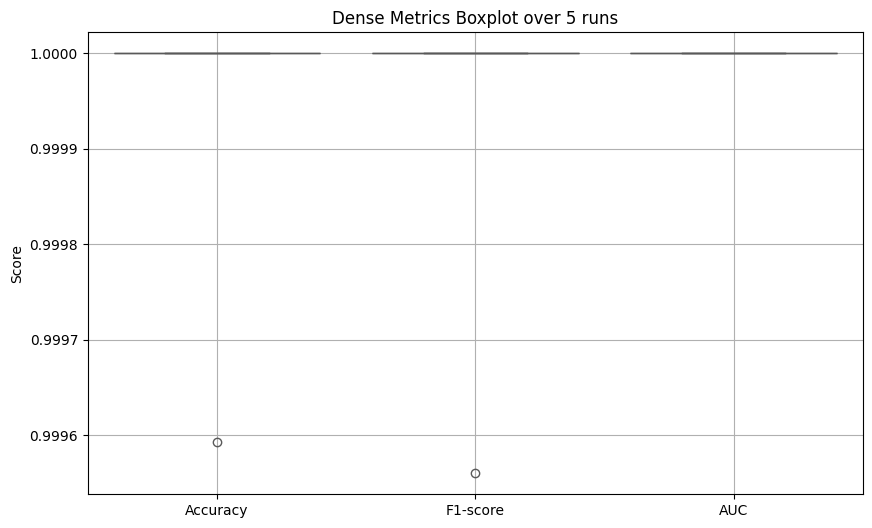


All run results saved to: /content/drive/MyDrive/UMN/results_all_models_coatnet_0_rw_224.csv


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
from tensorflow.keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"] = ""

# --- Data loading and preprocessing ---
def prepare_data(normal_path, anomaly_path):
    X_normal = np.load(normal_path, allow_pickle=True)
    if X_normal.ndim >= 4:
        X_normal = X_normal.mean(axis=(2, 3))
    X_anomaly = np.load(anomaly_path, allow_pickle=True)
    if X_anomaly.ndim >= 4:
        X_anomaly = X_anomaly.mean(axis=(2, 3))
    X = np.concatenate([X_normal, X_anomaly])
    y = np.concatenate([np.zeros(len(X_normal)), np.ones(len(X_anomaly))])
    X = X.astype(np.float32)
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    X, y = shuffle(X, y, random_state=42)
    return X, y

def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len + 1):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len - 1])
    return np.array(X_seq), np.array(y_seq)

# --- Model builders with 32 and 16 units ---
def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, activation='tanh', recurrent_activation='sigmoid', unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = GRU(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(32, return_sequences=True, unroll=True)(inputs)
    x = Dropout(0.3)(x)
    x = GRU(32)(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_simple_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(32)(inputs)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_dense_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Main execution ---
def main():
    feature_model_name = 'coatnet_0_rw_224'  # Change if needed
    seq_len = 10
    save_dir = '/content/drive/MyDrive/UMN'  # Change to your data path
    normal_path = f"{save_dir}/normal_features_{feature_model_name}.npy"
    anomaly_path = f"{save_dir}/anomaly_features_{feature_model_name}.npy"

    X, y = prepare_data(normal_path, anomaly_path)
    X_seq, y_seq = create_sequences(X, y, seq_len=seq_len)

    model_builders = {
        "LSTM": build_lstm_model,
        "GRU": build_gru_model,
        "LSTM_GRU": build_lstm_gru_model,
        "SimpleRNN": build_simple_rnn_model,
        "Dense": build_dense_model
    }

    num_runs = 5
    all_results = []

    for model_name, builder in model_builders.items():
        print(f"\n==== Training model: {model_name} ====")

        metrics_list = {
            "accuracy": [],
            "precision": [],
            "recall": [],
            "f1": [],
            "auc": []
        }

        histories = []

        for run in range(num_runs):
            print(f" Run {run+1}/{num_runs}")

            X_train, X_test, y_train, y_test = train_test_split(
                X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=run
            )

            model = builder(X_train.shape[1:])
            es = EarlyStopping(patience=5, restore_best_weights=True, verbose=0)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_test, y_test),
                epochs=50,
                batch_size=32,
                callbacks=[es],
                verbose=1
            )
            histories.append(history)

            y_prob = model.predict(X_test).ravel()
            y_pred = (y_prob > 0.5).astype(int)

            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            auc_score = roc_auc_score(y_test, y_prob)

            # Store metrics
            metrics_list["accuracy"].append(acc)
            metrics_list["precision"].append(prec)
            metrics_list["recall"].append(rec)
            metrics_list["f1"].append(f1)
            metrics_list["auc"].append(auc_score)

            all_results.append({
                "Model": model_name,
                "Run": run + 1,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F1": f1,
                "AUC": auc_score
            })

            # Clear to save memory
            K.clear_session()
            del model
            gc.collect()

        # Plot training curves for last run
        last_history = histories[-1]
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(last_history.history['accuracy'], label='Train Accuracy')
        plt.plot(last_history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(last_history.history['loss'], label='Train Loss')
        plt.plot(last_history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print mean ± std summary for all runs
        print(f"\n==== Summary for {model_name} (over {num_runs} runs) ====")
        for metric in metrics_list:
            mean_val = np.mean(metrics_list[metric])
            std_val = np.std(metrics_list[metric])
            print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

        # Plot boxplots of the 5 runs for metrics
        plt.figure(figsize=(10,6))
        sns.boxplot(data=[metrics_list["accuracy"], metrics_list["f1"], metrics_list["auc"]],
                    palette="Set2")
        plt.xticks([0,1,2], ['Accuracy', 'F1-score', 'AUC'])
        plt.title(f'{model_name} Metrics Boxplot over {num_runs} runs')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()

    # Save all results to CSV
    df = pd.DataFrame(all_results)
    csv_save_path = os.path.join(save_dir, f"results_all_models_{feature_model_name}.csv")
    df.to_csv(csv_save_path, index=False)
    print(f"\nAll run results saved to: {csv_save_path}")

if __name__ == "__main__":
    main()
